In [1]:
pwd

'C:\\Users\\Dell\\Music\\Capston Project\\Project 1- PRCP-1006- Home Loan\\Data'

# 1. Business problem

### - Prepare a complete data analysis report on the given data.
### - Create a predictive model  to  identify the factors / customer segments that are eligible for taking loan.


# 2. Importing Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 3. Loading Data

In [3]:
df1 = pd.read_csv('application_train.csv')

In [4]:
df2 = pd.read_csv('bureau.csv')

In [5]:
df3 = pd.read_csv('bureau_balance.csv')

In [6]:
df4 = pd.read_csv('credit_card_balance.csv')

In [7]:
df5 = pd.read_csv('installments_payments.csv')

In [8]:
df6 = pd.read_csv('POS_CASH_balance.csv')

In [9]:
df7 = pd.read_csv('previous_application.csv')

# 4. Basic Check

In [10]:
# checking the shape the data

print ("application_train     :",df1.shape)
print ("bureau                :",df2.shape)
print ("bureau_balance        :",df3.shape)
print ("credit_card_balance   :",df4.shape)
print ("installments_payments :",df5.shape)
print ("pos_cash_balance      :",df6.shape)
print ("previous_application  :",df7.shape)

application_train     : (307511, 122)
bureau                : (1716428, 17)
bureau_balance        : (27299925, 3)
credit_card_balance   : (3840312, 23)
installments_payments : (13605401, 8)
pos_cash_balance      : (10001358, 8)
previous_application  : (1670214, 37)


In [11]:
#checking the first 3 row of data 

display("application_train")
display(df1.head(3))
display("bureau")
display(df2.head(3))
display("bureau_balance")
display(df3.head(3))
display("credit_card_balance")
display(df4.head(3))
display("installments_payments")
display(df5.head(3))
display("pos_cash_balance")
display(df6.head(3))
display("previous_application")
display(df7.head(3))

'application_train'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


'bureau'

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


'bureau_balance'

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


'credit_card_balance'

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


'installments_payments'

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


'pos_cash_balance'

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


'previous_application'

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [12]:
#checking the last 3 row of data 

display("application_train")
display(df1.tail(3))
display("bureau")
display(df2.tail(3))
display("bureau_balance")
display(df3.tail(3))
display("credit_card_balance")
display(df4.tail(3))
display("installments_payments")
display(df5.tail(3))
display("pos_cash_balance")
display(df6.tail(3))
display("previous_application")
display(df7.tail(3))

'application_train'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


'bureau'

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.0,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.0,0.0,0.0,0.0,Consumer credit,-1508,NaN
1716427,246829,5057778,Closed,currency 1,-463,0,NaN,-387.0,NaN,0,22500.0,0.0,NaN,0.0,Microloan,-387,NaN


'bureau_balance'

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
27299922,5041336,-49,X
27299923,5041336,-50,X
27299924,5041336,-51,X


'credit_card_balance'

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.0,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.0,...,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840311,2411345,236760,-10,0.000,157500,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0,0.0,0.0,21.0,Completed,0,0


'installments_payments'

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN
13605400,2448869,434321,1.0,19,-27.0,NaN,11504.250,NaN


'pos_cash_balance'

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0
10001357,1259607,174278,-52,16.0,0.0,Completed,0,0


'previous_application'

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [13]:
#checking the type of data 

display("application_train")
display(df1.dtypes)
display("bureau")
display(df2.dtypes)
display("bureau_balance")
display(df3.dtypes)
display("credit_card_balance")
display(df4.dtypes)
display("installments_payments")
display(df5.dtypes)
display("pos_cash_balance")
display(df6.dtypes)
display("previous_application")
display(df7.dtypes)

'application_train'

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

'bureau'

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

'bureau_balance'

SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

'credit_card_balance'

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

'installments_payments'

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

'pos_cash_balance'

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

'previous_application'

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [14]:
#checking all the columns of data 

display("application_train")
display(df1.columns)
display("bureau")
display(df2.columns)
display("bureau_balance")
display(df3.columns)
display("credit_card_balance")
display(df4.columns)
display("installments_payments")
display(df5.columns)
display("pos_cash_balance")
display(df6.columns)
display("previous_application")
display(df7.columns)

'application_train'

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

'bureau'

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

'bureau_balance'

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

'credit_card_balance'

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

'installments_payments'

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

'pos_cash_balance'

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

'previous_application'

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [15]:
#checking all the data types 

display("application_train")
display(df1.info())
display("bureau")
display(df2.info())
display("bureau_balance")
display(df3.info())
display("credit_card_balance")
display(df4.info())
display("installments_payments")
display(df5.info())
display("pos_cash_balance")
display(df6.info())
display("previous_application")
display(df7.info())


'application_train'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

'bureau'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


None

'bureau_balance'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


None

'credit_card_balance'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

None

'installments_payments'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


None

'pos_cash_balance'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


None

'previous_application'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

None

# 5. Domain Analysis

### Domain : Banking

1. application_train.csv :-

* The main file which contains the Target(1:Defaulter ; 0: Not Defaulter)
* Static data for all applications. One row represents one loan in our data sample.

2. bureau.csv :-

* All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
* For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

3. bureau_balance.csv :-

* Monthly balances of previous credits in Credit Bureau.
* This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

4. credit_card_balance.csv :-

* Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows. 

5. installments_payments.csv :-

* Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
* There is a) one row for every payment that was made plus b) one row each for missed payment.
* One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.
 

6. POS_CASH_balance.csv :-

* Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows. 

7. previous_application.csv
* All previous applications for Home Credit loans of clients who have loans in our sample.
* There is one row for each previous application related to loans in our data sample.
* installments_payments.csv
* Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
* There is a) one row for every payment that was made plus b) one row each for missed payment.
* One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.


# 6. Exploratory Data Analysis (EDA)

## 1. Univariate Analysis

There are 282686 loans repaid on time (TARGET=0) and 24825 loans defaulted (TARGET=1) in the dataset


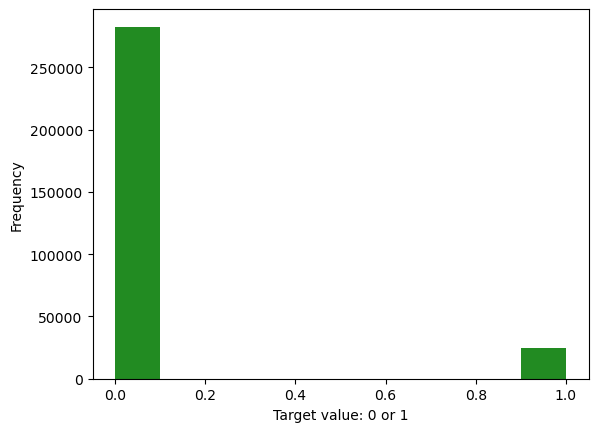

In [16]:
# Target data distribution

df1['TARGET'].astype(int).plot.hist(color='forestgreen').set_xlabel('Target value: 0 or 1');

count = df1['TARGET'].value_counts()
num_repaid = count[0]
num_default = count[1]

print("There are {} loans repaid on time (TARGET=0) and {} loans defaulted (TARGET=1) in the dataset".format(num_repaid, num_default))

In [17]:
#checking all the missing value in the dataset 

display("application_train")
display(df1.isnull().sum())
display("bureau")
display(df2.isnull().sum())
display("bureau_balance")
display(df3.isnull().sum())
display("credit_card_balance")
display(df4.isnull().sum())
display("installments_payments")
display(df5.isnull().sum())
display("pos_cash_balance")
display(df6.isnull().sum())
display("previous_application")
display(df7.isnull().sum())

'application_train'

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

'bureau'

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

'bureau_balance'

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

'credit_card_balance'

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

'installments_payments'

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

'pos_cash_balance'

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

'previous_application'

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

(0.0, 100.0)

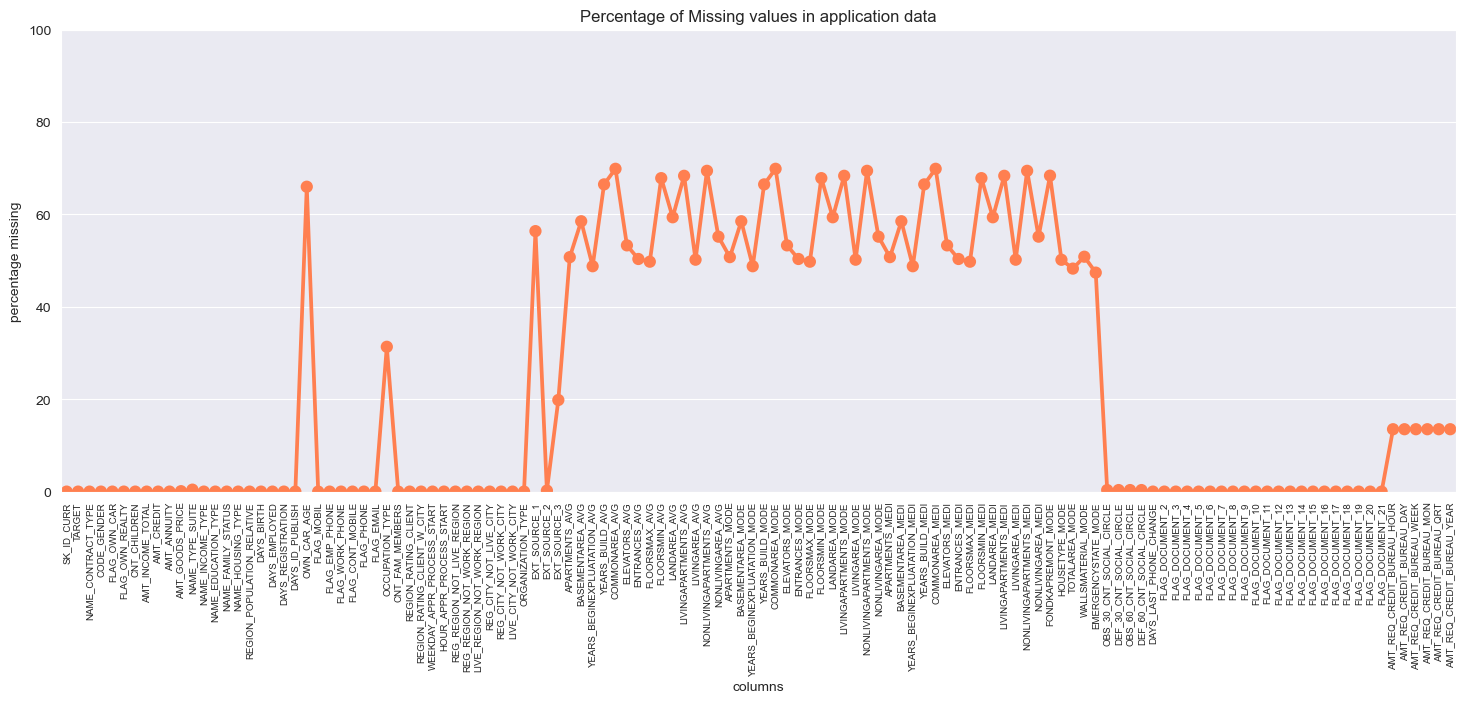

In [18]:
# Missing data in application (main) dataset

fig = plt.figure(figsize=(18,6))
miss_data = pd.DataFrame((df1.isnull().sum())*100/df1.shape[0]).reset_index()
miss_data["type"] = "application data"
sns.set_style('darkgrid')
ax = sns.pointplot(x='index',y=0,data=miss_data, color='coral')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application data")
plt.ylabel("percentage missing")
plt.xlabel("columns")
plt.ylim((0,100))

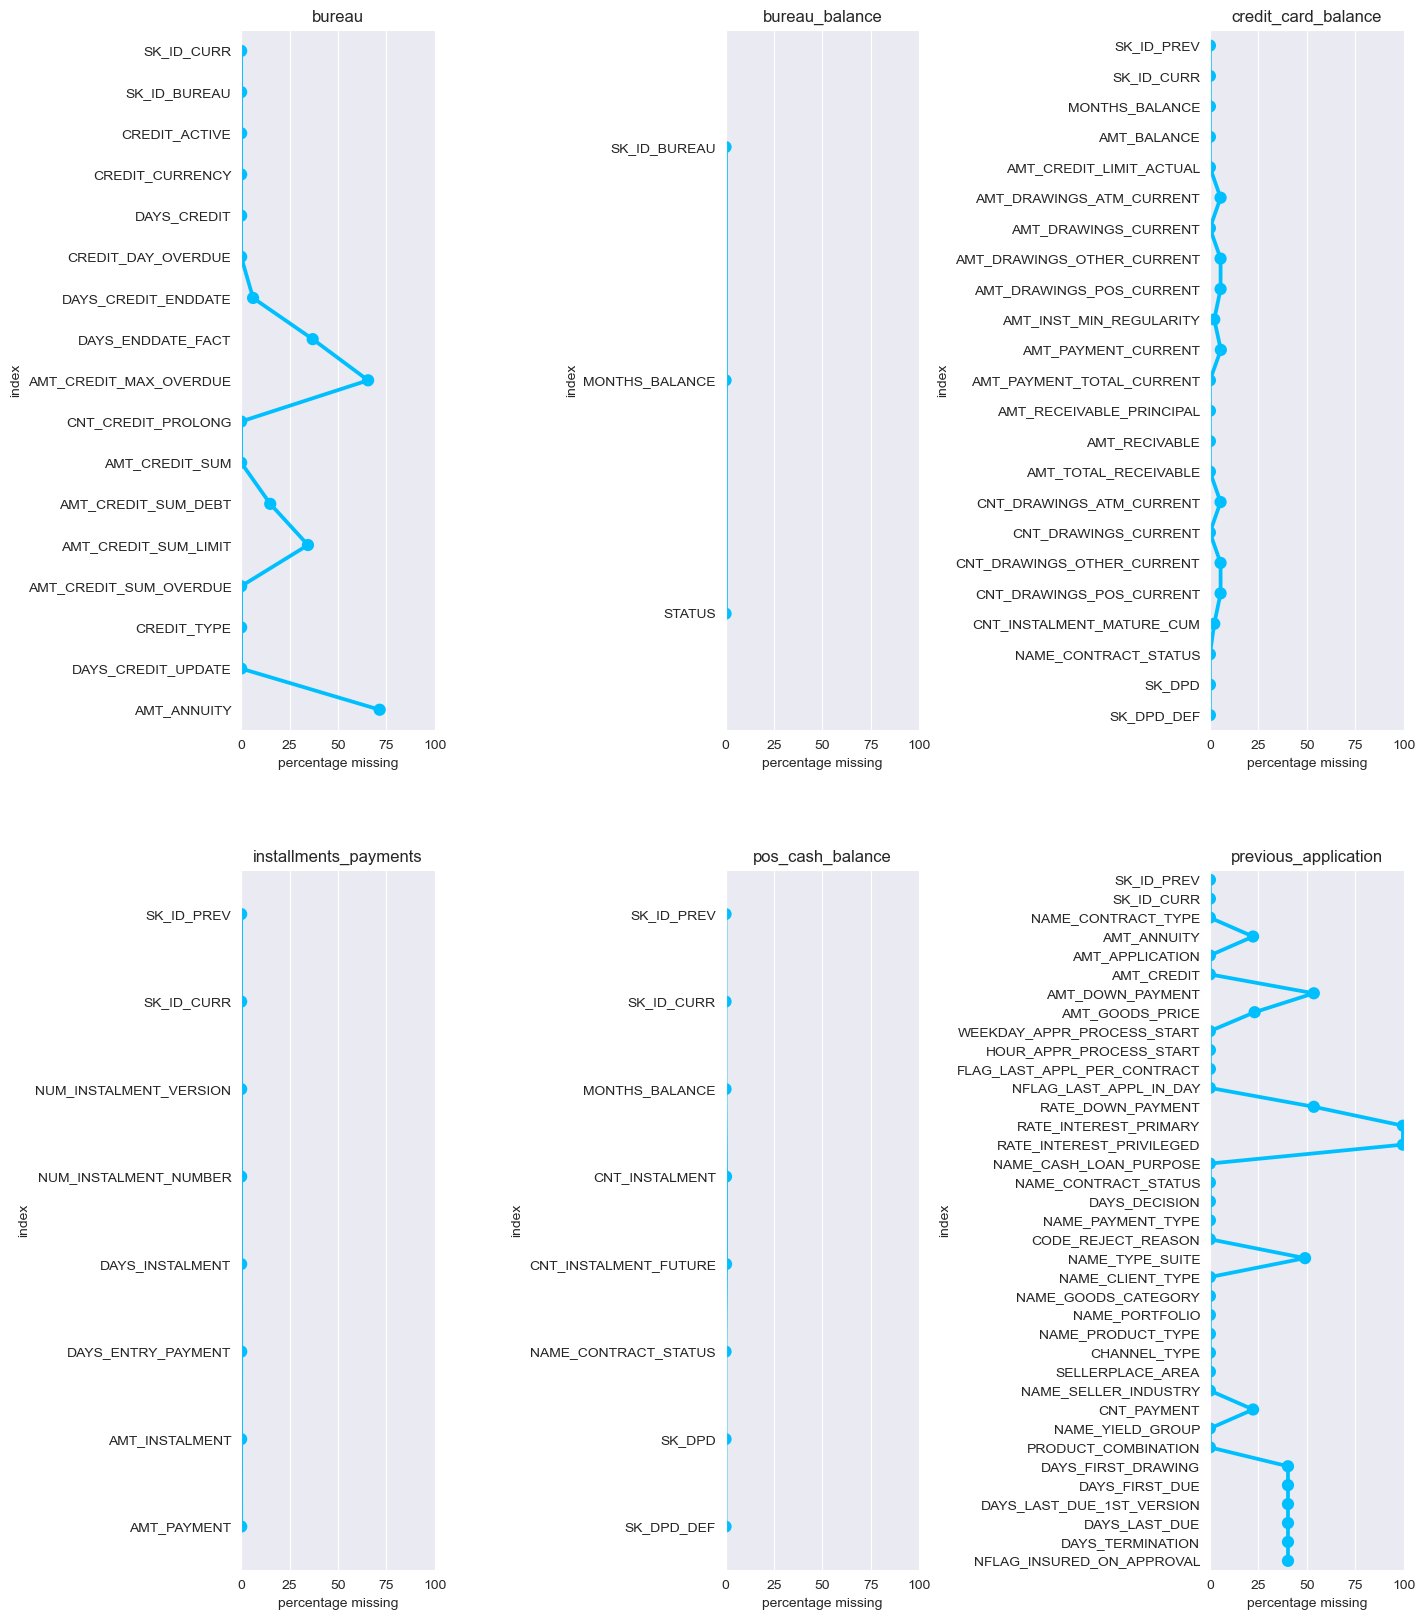

In [19]:
# Missing data in other data

plt.figure(figsize=(15,20))

plt.subplot(231)
sns.pointplot(x=0,y="index",data=pd.DataFrame(df2.isnull().sum()/df2.shape[0]*100).reset_index(), color='deepskyblue')
plt.xlabel("percentage missing")
plt.xlim((0,100))
plt.title("bureau")

plt.subplot(232)
sns.pointplot(x=0,y="index",data=pd.DataFrame(df3.isnull().sum()/df3.shape[0]*100).reset_index(), color='deepskyblue')
plt.xlabel("percentage missing")
plt.xlim((0,100))
plt.title("bureau_balance")

plt.subplot(233)
sns.pointplot(x=0,y="index",data=pd.DataFrame(df4.isnull().sum()/df5.shape[0]*100).reset_index(), color='deepskyblue')
plt.xlabel("percentage missing")
plt.xlim((0,100))
plt.title("credit_card_balance")

plt.subplot(234)
sns.pointplot(x=0,y="index",data=pd.DataFrame(df5.isnull().sum()/df6.shape[0]*100).reset_index(), color='deepskyblue')
plt.xlabel("percentage missing")
plt.xlim((0,100))
plt.title("installments_payments")

plt.subplot(235)
sns.pointplot(x=0,y="index",data=pd.DataFrame(df6.isnull().sum()/df6.shape[0]*100).reset_index(), color='deepskyblue')
plt.xlabel("percentage missing")
plt.xlim((0,100))
plt.title("pos_cash_balance")

plt.subplot(236)
sns.pointplot(x=0,y="index",data=pd.DataFrame(df7.isnull().sum()/df7.shape[0]*100).reset_index(), color='deepskyblue')
plt.xlabel("percentage missing")
plt.xlim((0,100))
plt.title("previous_application")

plt.subplots_adjust(wspace = 1.5)

In [20]:
def plot_bar_gen(feature, data = None, orientation_horizontal = True):
    
    if data is None:
        data = df1
    else:
        data = data
    
    temp = data[feature].value_counts()
    data1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    sns.set_color_codes("colorblind")
    
    if orientation_horizontal == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        s1 = sns.barplot(y = feature, x="Number of contracts",data=data1)
        plt.subplot(122)
        s2 = sns.barplot(y = feature, x='TARGET', data=cat_perc)
        plt.xlabel('Fraction of loans defaulted', fontsize=12)
        plt.ylabel(feature, fontsize=12)
        
    else:
        plt.figure(figsize=(10,18))
        plt.subplot(211)
        s1 = sns.barplot(x = feature, y="Number of contracts",data=data1)
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
        plt.subplot(212)
        s2 = sns.barplot(x = feature, y='TARGET', data=cat_perc)
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
        plt.ylabel('Fraction of loans defaulted', fontsize=12)
        plt.xlabel(feature, fontsize=12)
    
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace = 0.6)
    plt.show();

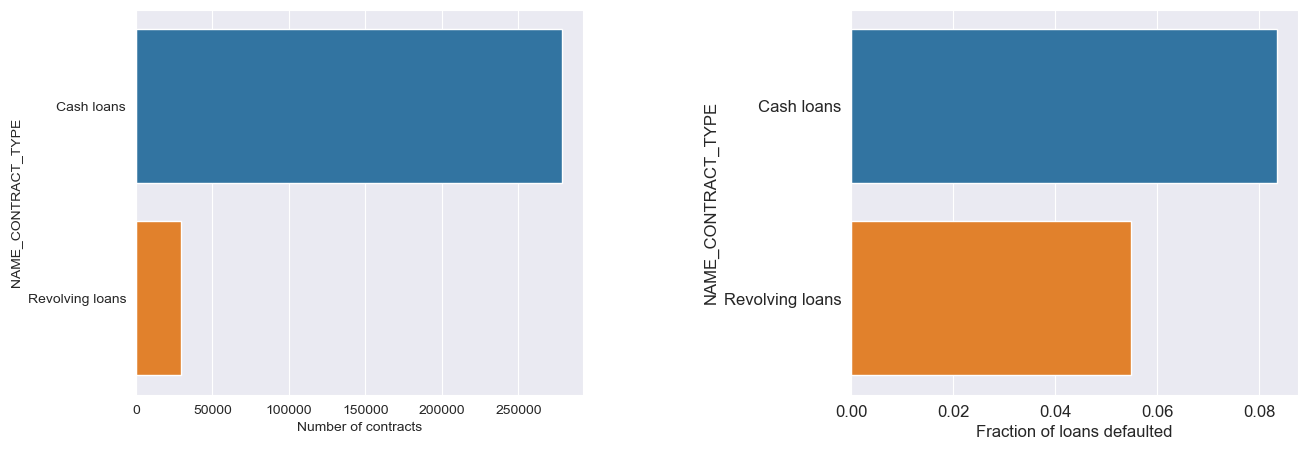

In [21]:
plot_bar_gen('NAME_CONTRACT_TYPE')

### Insites
#### For the feature, type of contract, we see that there are more cash loans taken than revolving loans and they are also more defaulted.

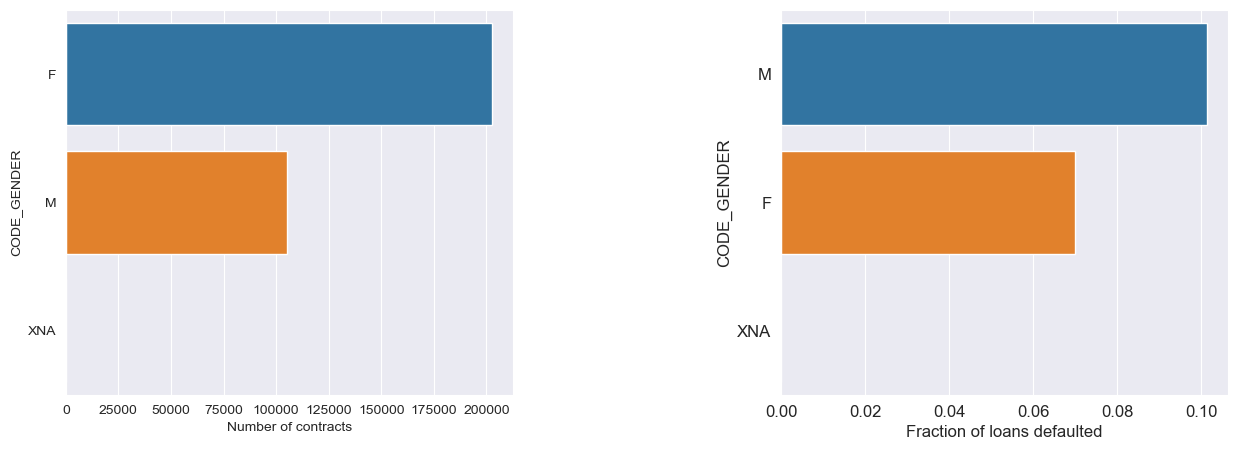

In [22]:
plot_bar_gen('CODE_GENDER')

### Insites

#### For the feature, gender, we see that there are more loans taken by males and they are also more defaulted by them.

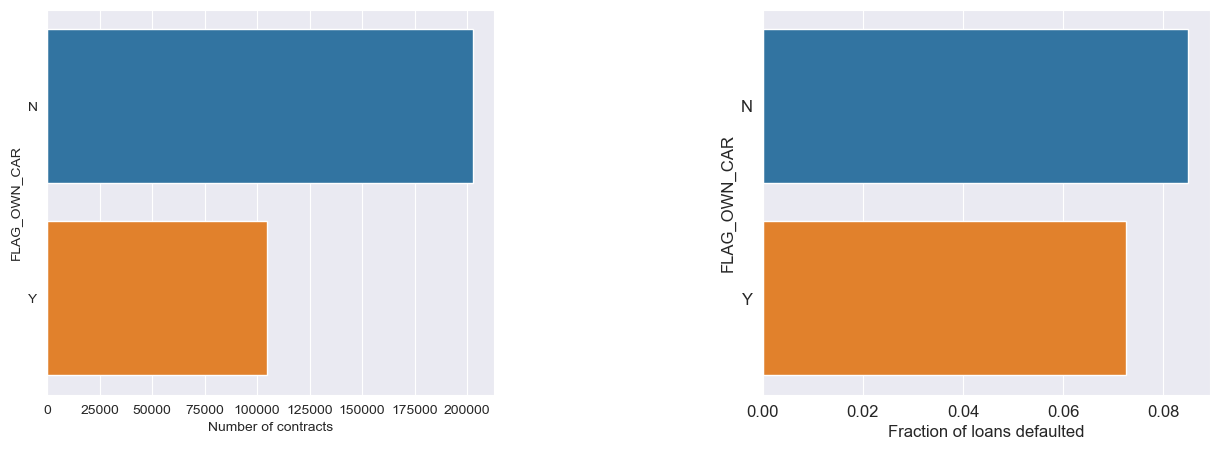

In [23]:
plot_bar_gen('FLAG_OWN_CAR')

### Insites

#### For the feature, owning car, we see that there are more loans taken by those without car and they are also more defaulted by them.

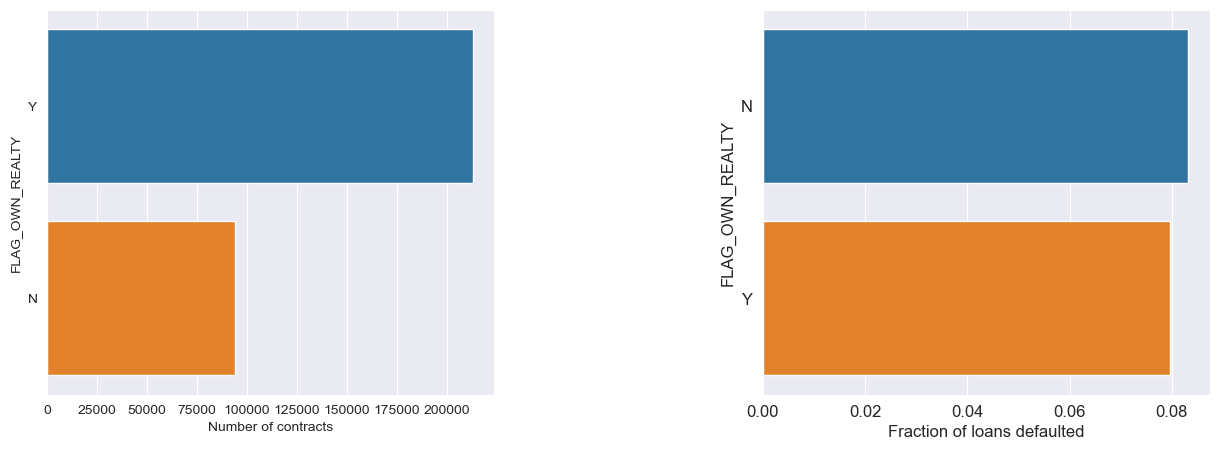

In [24]:
plot_bar_gen('FLAG_OWN_REALTY')

### Insites

#### For the feature, owning realty, we see that there are more loans taken by those with realty and they are defaulted slightly more by those without realty.

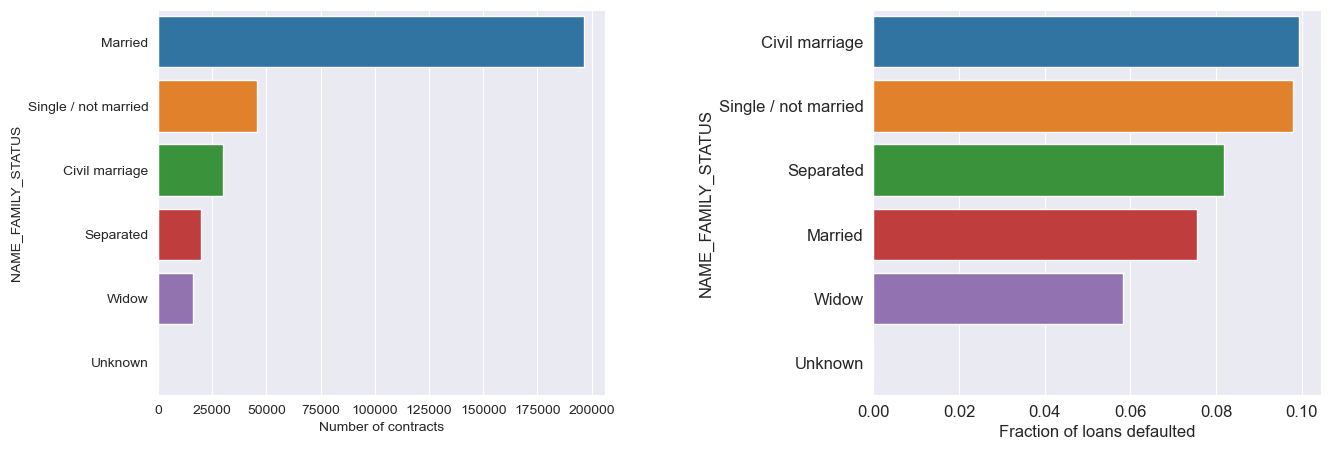

In [25]:
plot_bar_gen('NAME_FAMILY_STATUS')

### Insites

#### For the feature, family status, we see that there are more loans taken by those who are married and they are more defaulted by those who are in a civil marriage/single

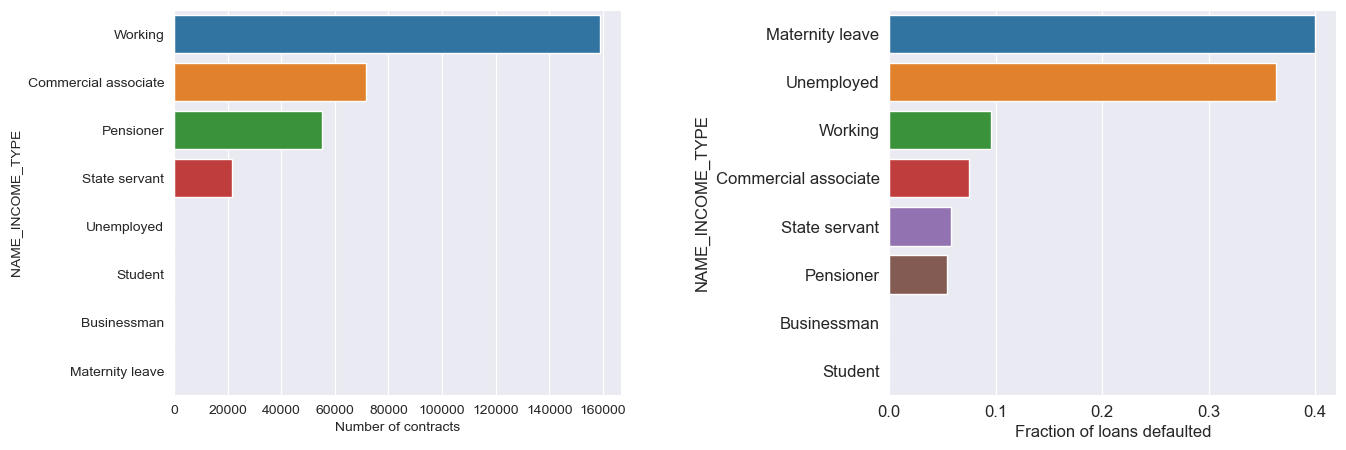

In [26]:
plot_bar_gen('NAME_INCOME_TYPE')

### Insites

#### For the feature, income type, we see that there are more loans taken by those who are working and they are more defaulted by those who are on maternity leave or unemployed.

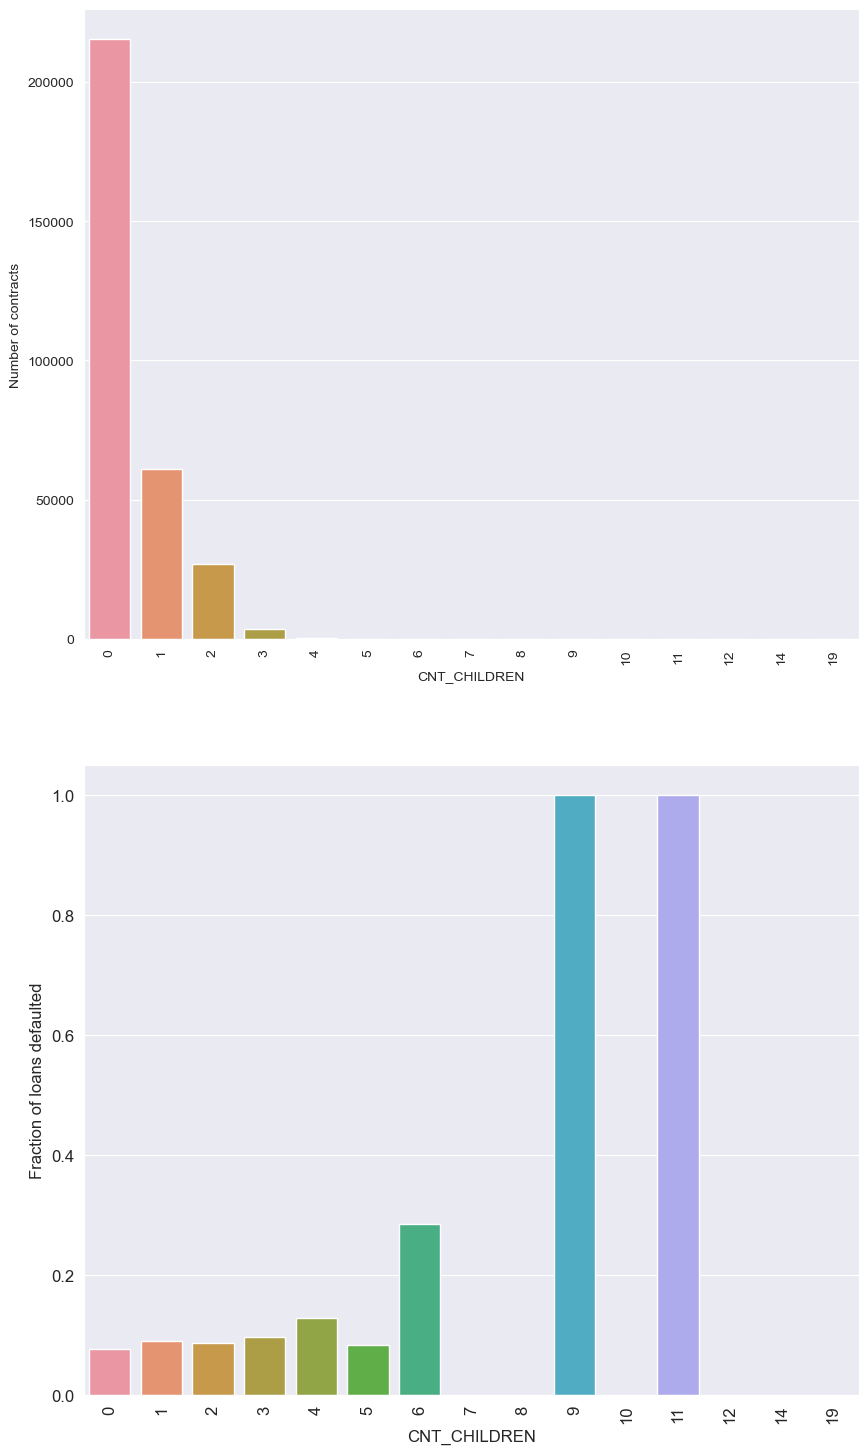

In [27]:
plot_bar_gen('CNT_CHILDREN',None,False)

### Insites 

#### For the feature, children count, we see that there are more loans taken by those who have fewer children and they are more defaulted by those who have more children

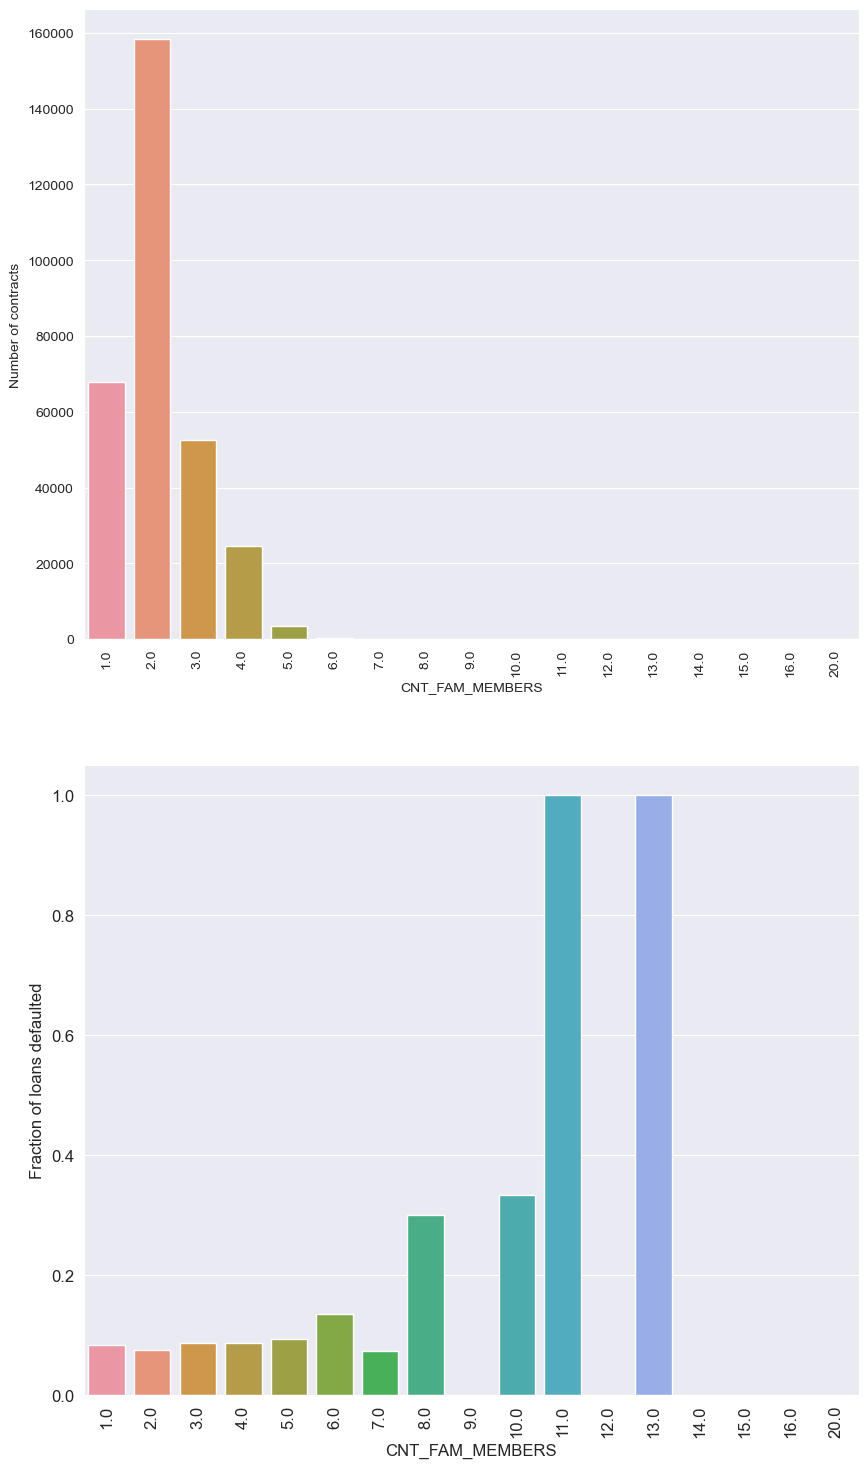

In [28]:
plot_bar_gen('CNT_FAM_MEMBERS',None,False)

### Insites

#### For the feature, family member count, we see that there are more loans taken by those who have fewer family member and they are more defaulted by those who have more members

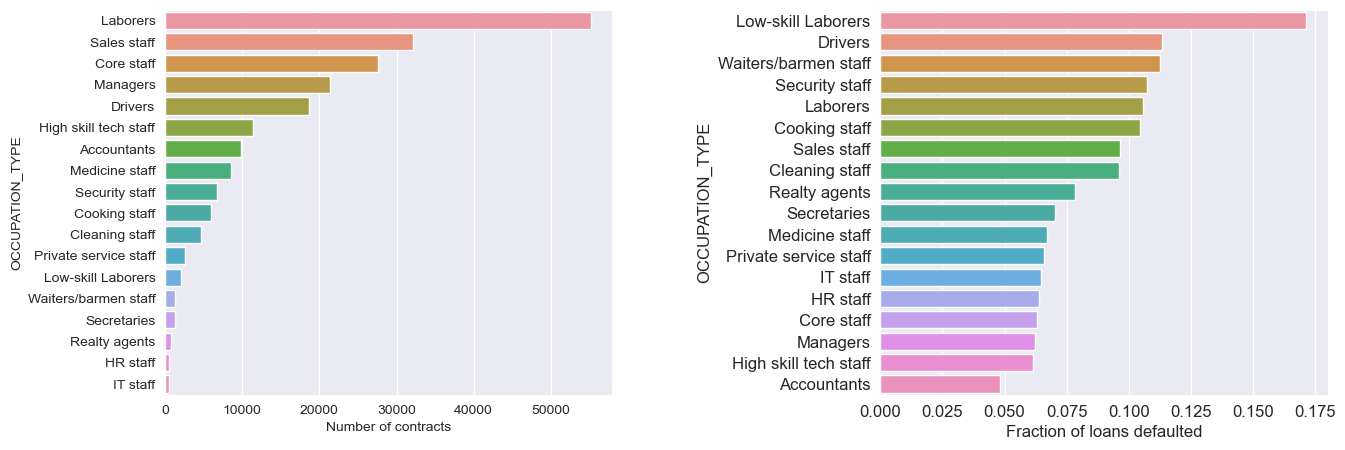

In [29]:
plot_bar_gen('OCCUPATION_TYPE')

### Insites

#### For the feature, occupation type, we see that there are more loans taken categories like laborers and they are more defaulted by them too

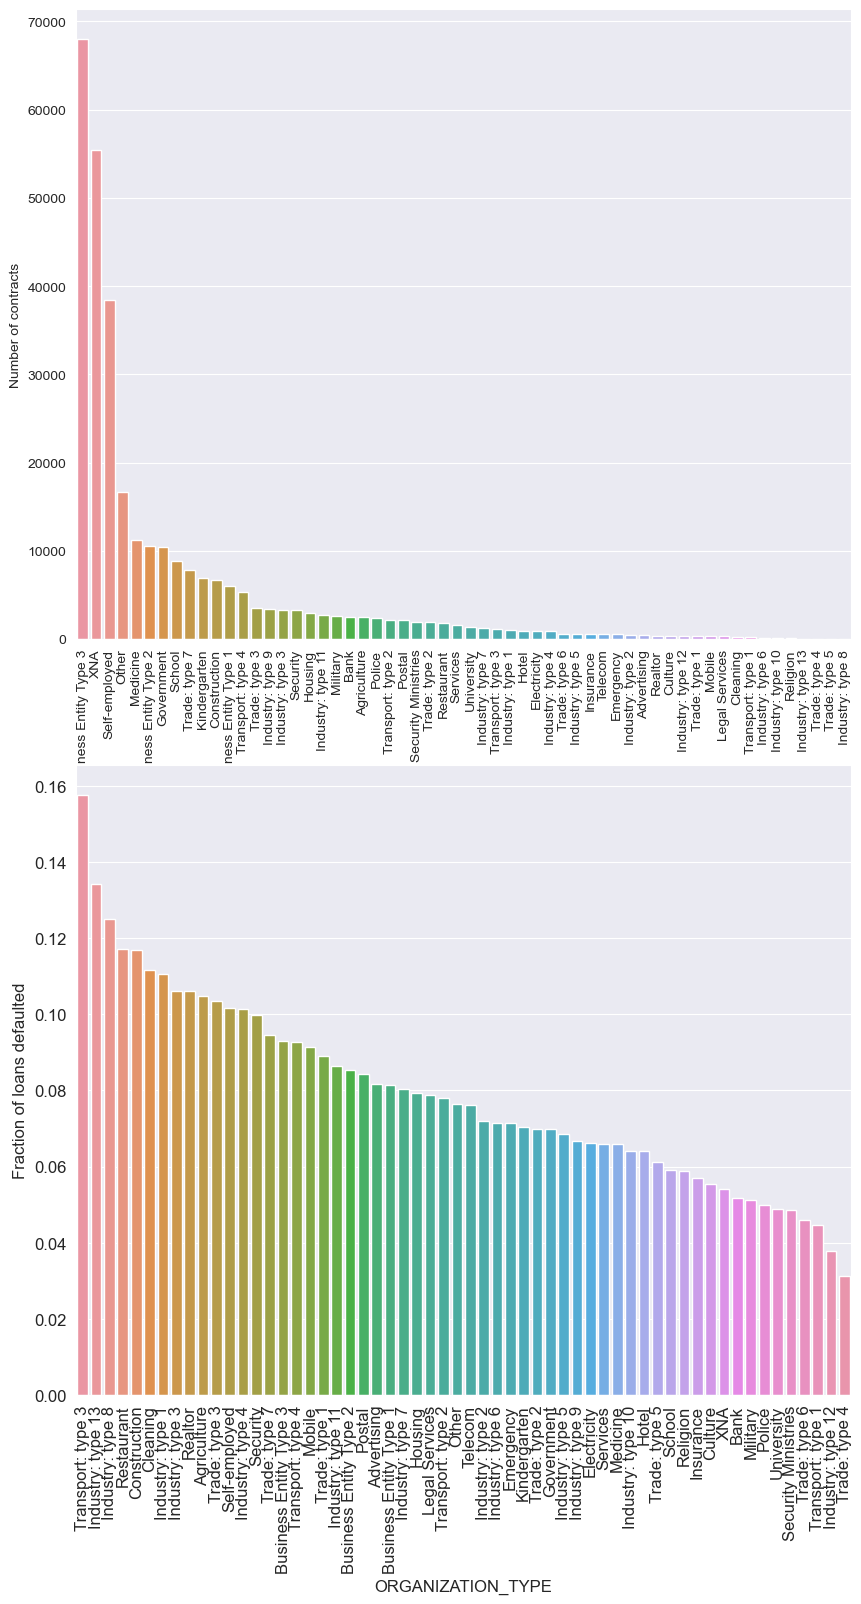

In [30]:
plot_bar_gen('ORGANIZATION_TYPE',None,False)

### Insites

#### For the feature, organization type, we see that there are more loans taken by categories like business entities, self-employed,and miscellaneous groups not categorized. They are more defaulted by those in certain industries

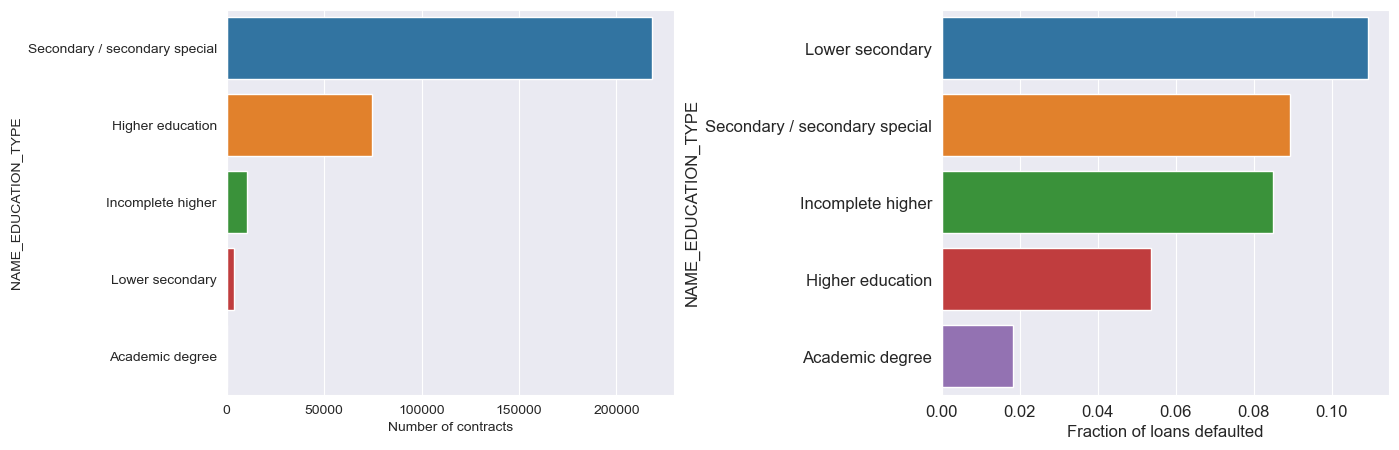

In [31]:
plot_bar_gen('NAME_EDUCATION_TYPE')

### Insites

#### For the feature, education type, we see that there are more loans taken by those with secondary education and they are more defaulted by those who have less education

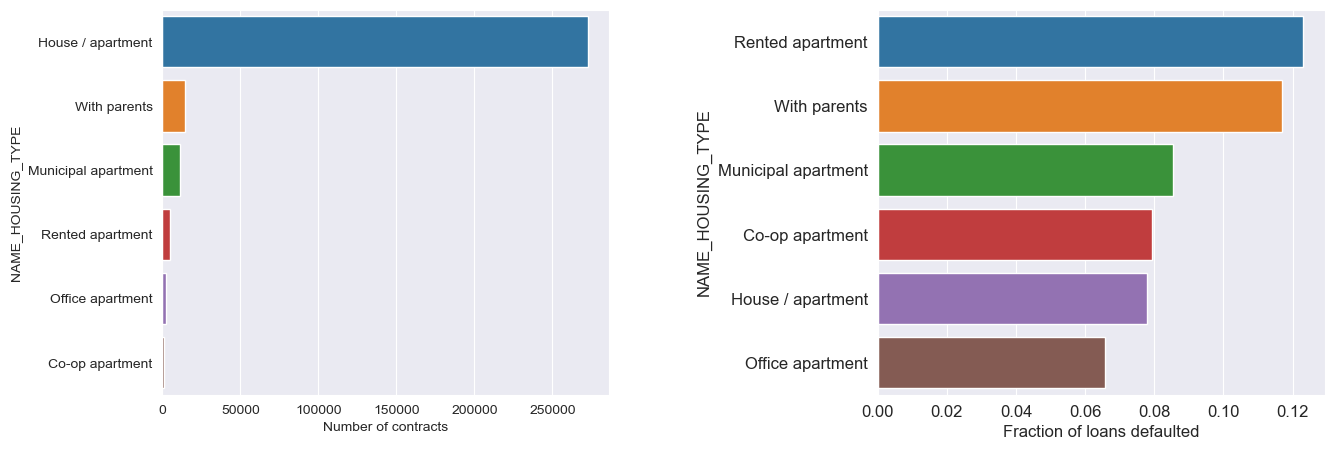

In [32]:
plot_bar_gen('NAME_HOUSING_TYPE')

### Insites

#### For the feature, housing type, we see that there are more loans taken by those with a house/apartment and they are more defaulted by those who have rented apartment or live with parents

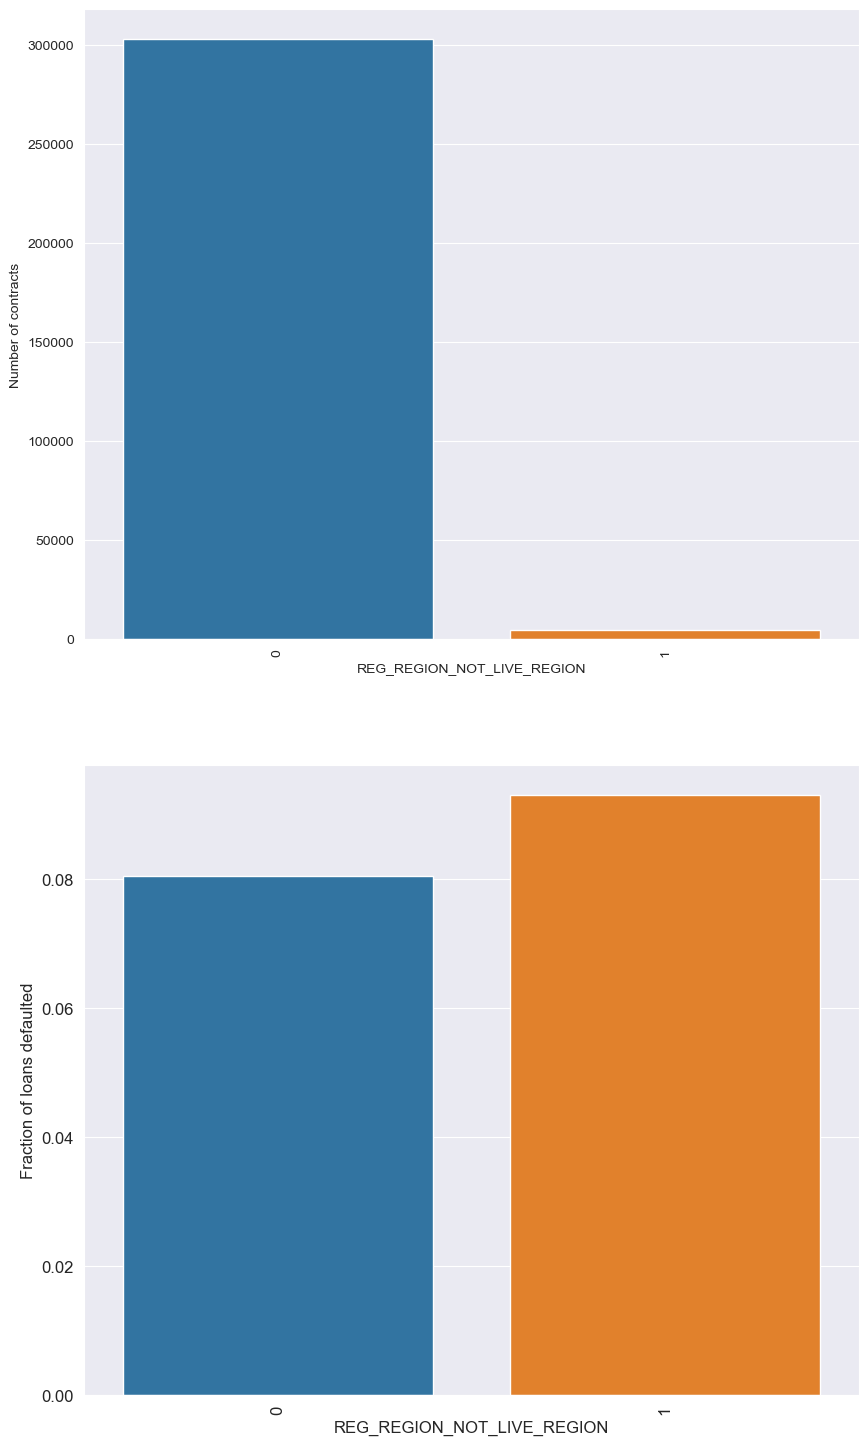

In [33]:
plot_bar_gen('REG_REGION_NOT_LIVE_REGION',None,False)

### Insites

#### For the feature, region not living region, we see that there are more loans are taken by those living in same region (0) and they are more defaulted by those who don't live in same region

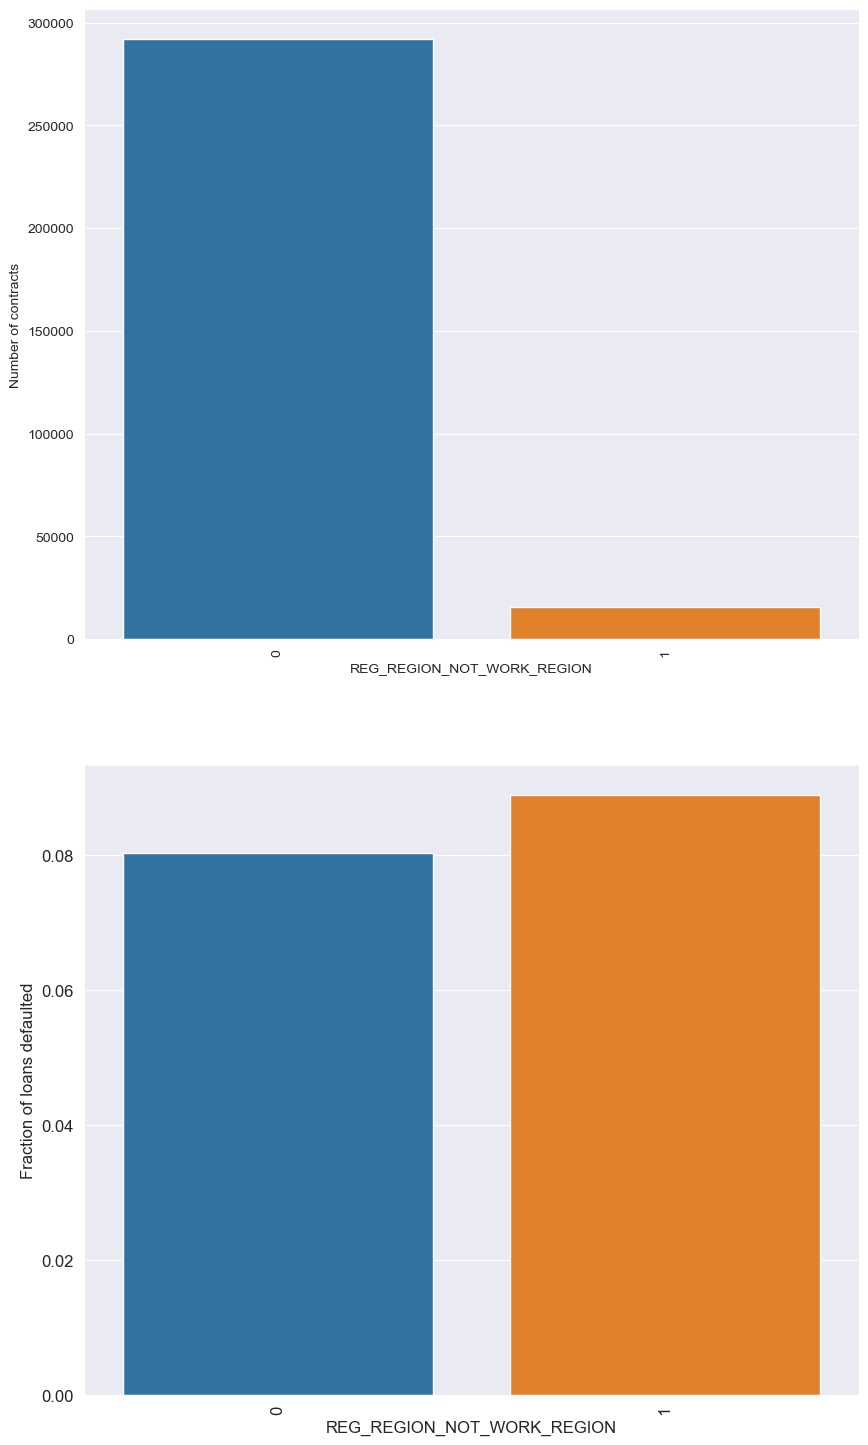

In [34]:
plot_bar_gen('REG_REGION_NOT_WORK_REGION',None,False)

### Insites

#### For the feature, region not work region, we see that there are more loans are taken by those working in same region (0) and they are more defaulted by those who don't work in same region

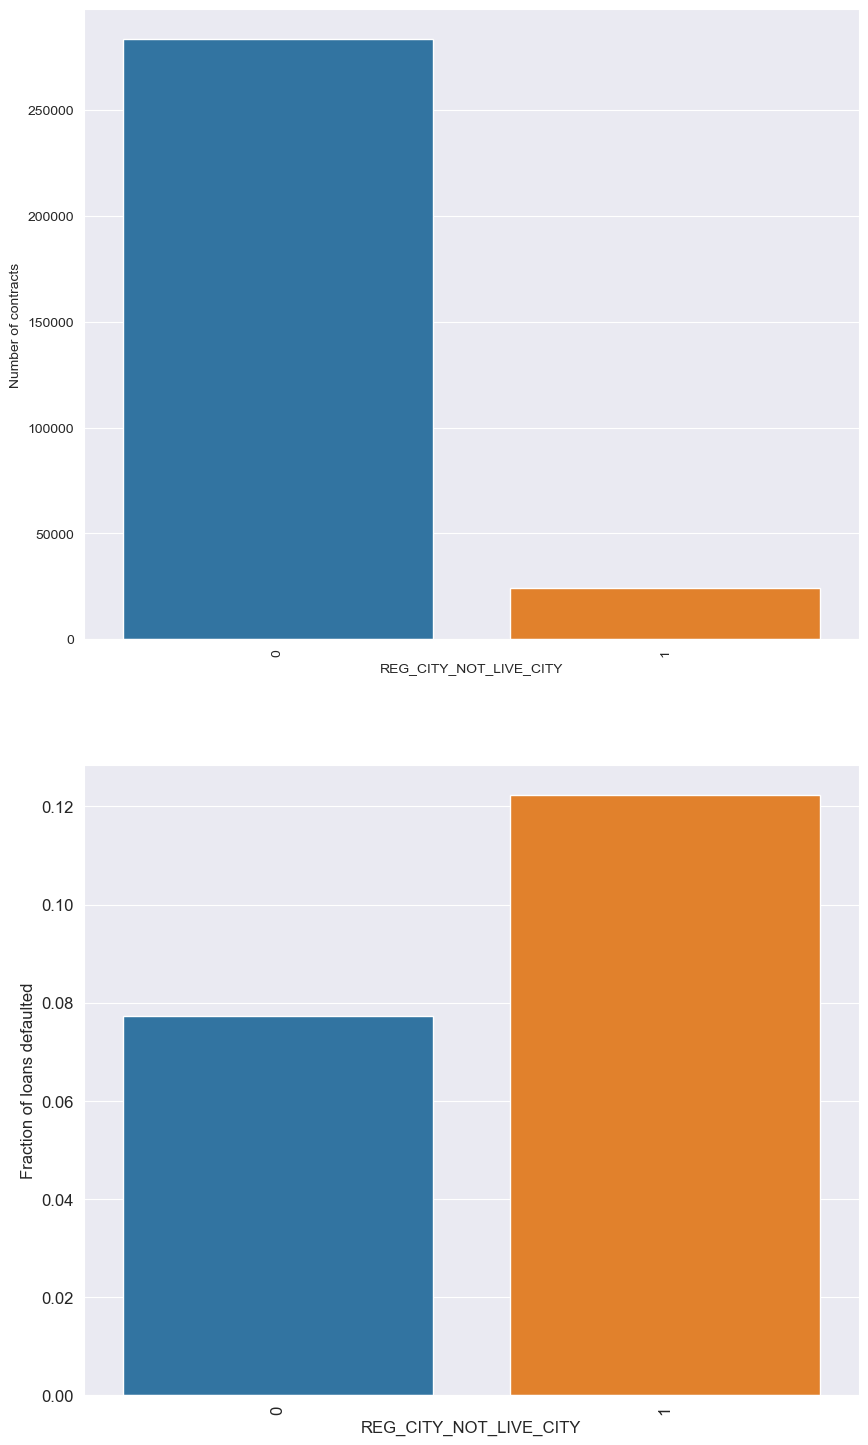

In [35]:
plot_bar_gen('REG_CITY_NOT_LIVE_CITY',None,False)

### Insites

#### For the feature, city not living city, we see that there are more loans are taken by those living in same city (0) and they are more defaulted by those who don't live in same city

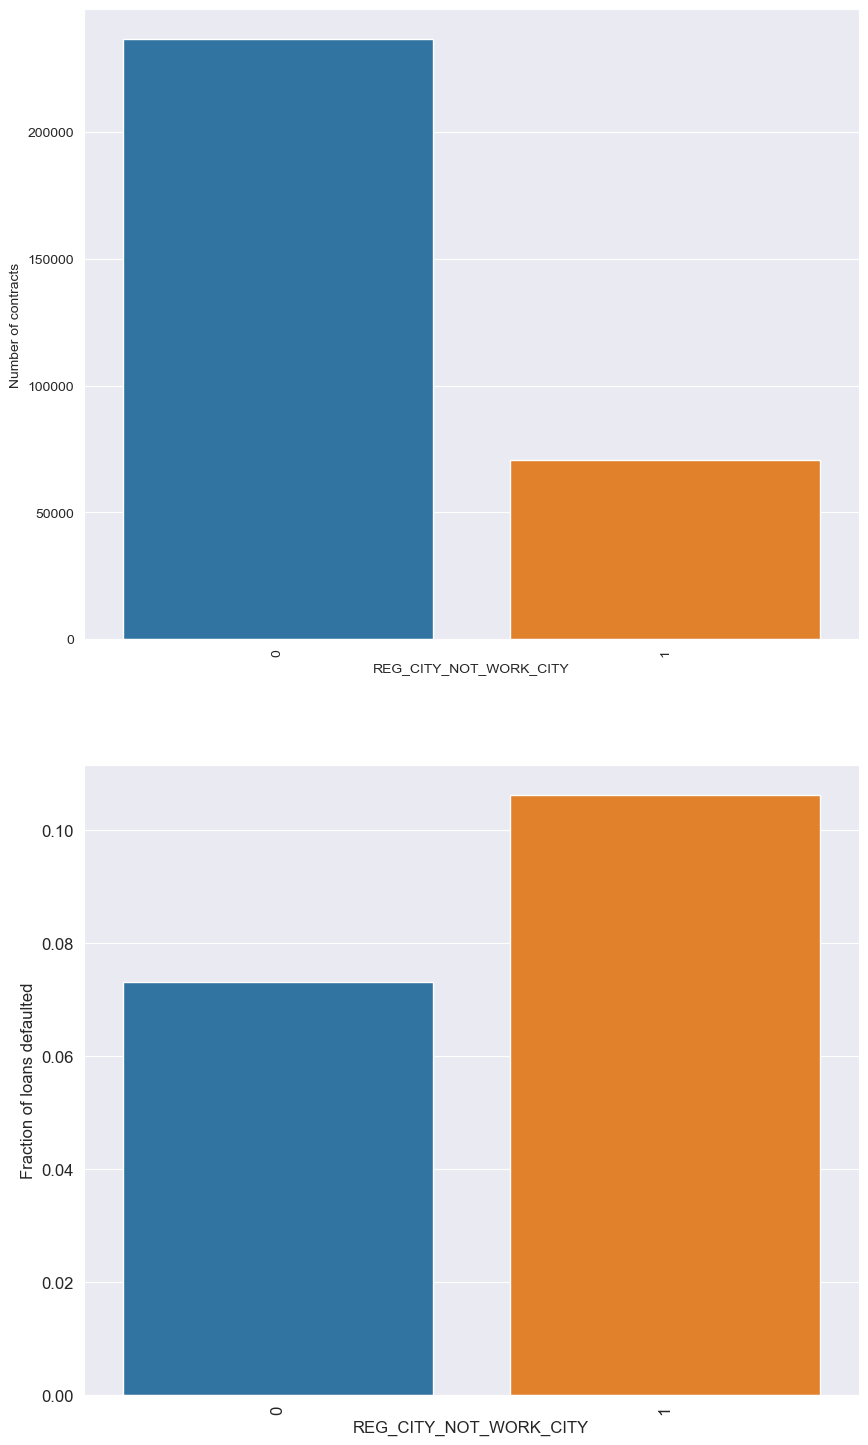

In [36]:
plot_bar_gen('REG_CITY_NOT_WORK_CITY',None,False)

### Insites

#### For the feature, city not working city, we see that there are more loans are taken by those working in same city (0) and they are more defaulted by those who don't work in same city

## 2. Bivariate Analysis

#### For non-categorical features, we can plot bivariate distributions (with TARGET) to see if there is difference when loan is repaid or defaulted

In [37]:
# Plot distribution of one feature with or without paid/default shown separately

def plot_distribution_gen(feature,data=None,separate_target=False):
    if data is None:
        data = df1
    else:
        data = data
        
    if separate_target == False:
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.distplot(data[feature].dropna(),color='red', kde=True,bins=100)
    else:
        t1 = data.loc[data['TARGET'] != 0]
        t0 = data.loc[data['TARGET'] == 0]
        
        plt.figure(figsize=(10,6))
        plt.title("Distribution of %s" % feature)
        sns.set_style('whitegrid')
#         sns.kdeplot(t1[feature], bw=0.5,label="Loan defaulted (TARGET=1)")
#         sns.kdeplot(t0[feature], bw=0.5,label="Loan repaid (TARGET = 0)")
        
        sns.kdeplot(data.loc[data['TARGET'] == 0, feature], label = 'target == 0')
        sns.kdeplot(data.loc[data['TARGET'] == 1, feature], label = 'target == 1')
    
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.legend(loc="best", labels=['Loan repaid (TARGET=0)', 'Loan defaulted (TARGET=1)'])
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [38]:
def get_thresh(feature):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(df1[feature])
    sdev=np.std(df1[feature])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for',feature,':',threshold)
    return threshold

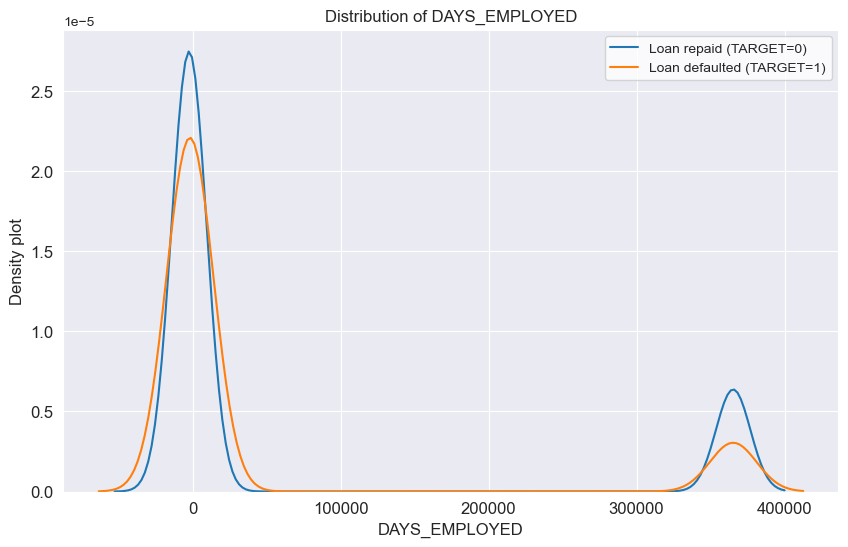

In [39]:
plot_distribution_gen('DAYS_EMPLOYED',None,True)

### Insites

#### For the feature, days employed, we see that there is an issue in the data with outliers with days employed more than 350000 days (958 years) ! This needs to be corrected

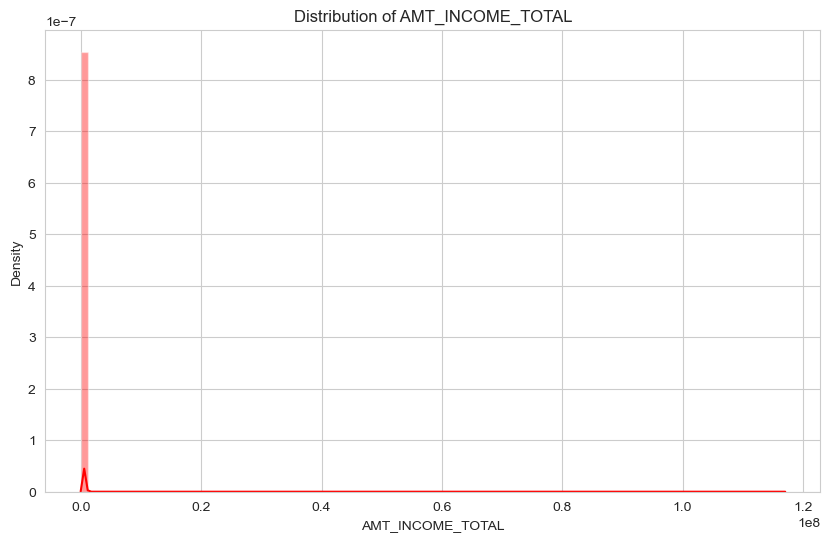

In [40]:
plot_distribution_gen('AMT_INCOME_TOTAL')

### Insites

#### For the feature, amount income total, we see that there is an issue in the data, possibly due to outliers. This needs to be corrected

In [41]:
#We can find the thresholds for outliers for the days employed and total income features,
#replace the anomalous values with NaN

thresh_income = get_thresh('AMT_INCOME_TOTAL')
thresh_employment = get_thresh('DAYS_EMPLOYED')

anomalous_employment = df1[df1['DAYS_EMPLOYED'] > 0]
normal_employment = df1[df1['DAYS_EMPLOYED'] < 0]

print('The non-anomalies default on %0.2f%% of loans' % (100 * normal_employment['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anomalous_employment['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anomalous_employment))

Threshold for AMT_INCOME_TOTAL : 880166.2
Threshold for DAYS_EMPLOYED : 487641.66
The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [42]:
# Replace the anomalous values with nan

df1['DAYS_EMPLOYED'].mask(df1['DAYS_EMPLOYED'] > 0, inplace=True)
df1['AMT_INCOME_TOTAL'].mask(df1['AMT_INCOME_TOTAL'] > thresh_income, inplace=True)

In [43]:
# The below function can be used to convert features which have days to years. 
# The function can then be applied on all such features

def create_day_to_year(data,ls_cols,newcol):
    data[newcol] = round(np.abs(data[ls_cols[0]]/365))
    data.drop(columns=ls_cols,inplace=True);
    return data

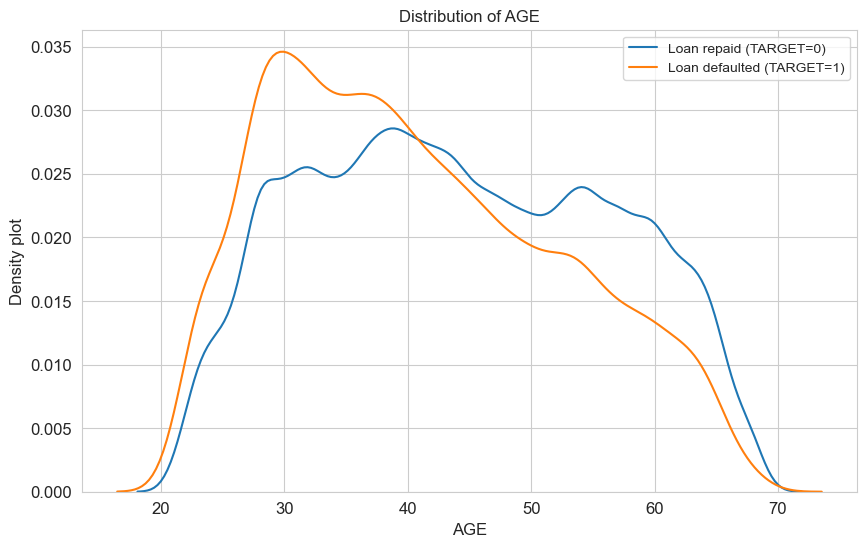

In [44]:
create_day_to_year(df1,['DAYS_BIRTH'],'AGE');
plot_distribution_gen('AGE',None,True)

### Insites

#### For the feature, AGE, we can see that there are more number of loans defaulted by younger people

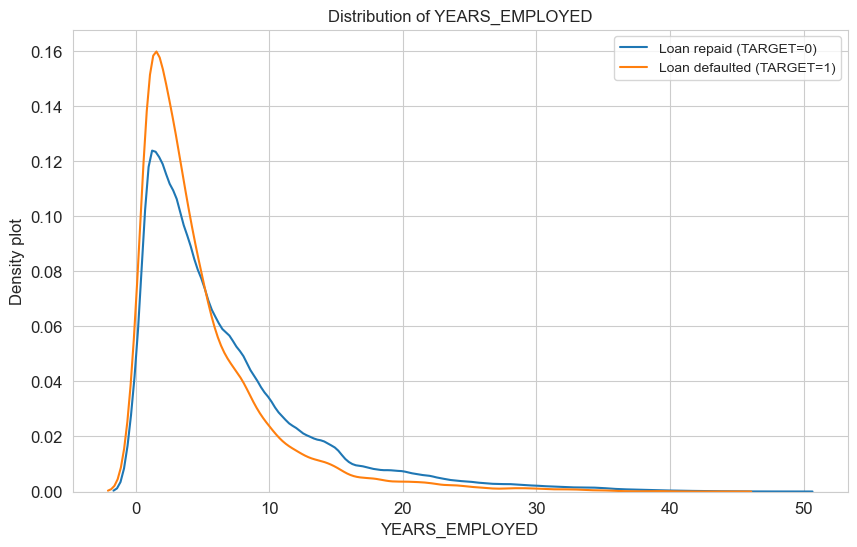

In [45]:
create_day_to_year(df1,['DAYS_EMPLOYED'],'YEARS_EMPLOYED');
plot_distribution_gen('YEARS_EMPLOYED',None,True)

### Insites

#### For the feature, YEARS_EMPLOYED, we can see that there are more number of loans defaulted by people who are employed for fewer years

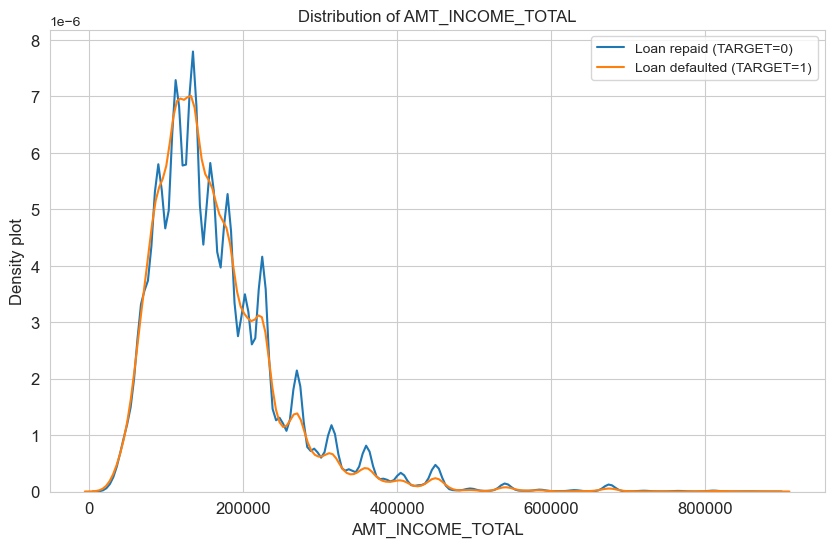

In [46]:
plot_distribution_gen('AMT_INCOME_TOTAL',None,True)

### Insites

#### Now we can revisit the total income feature after removing outliers and we see the minor differences in distributions when loans are repaid or defaulted.

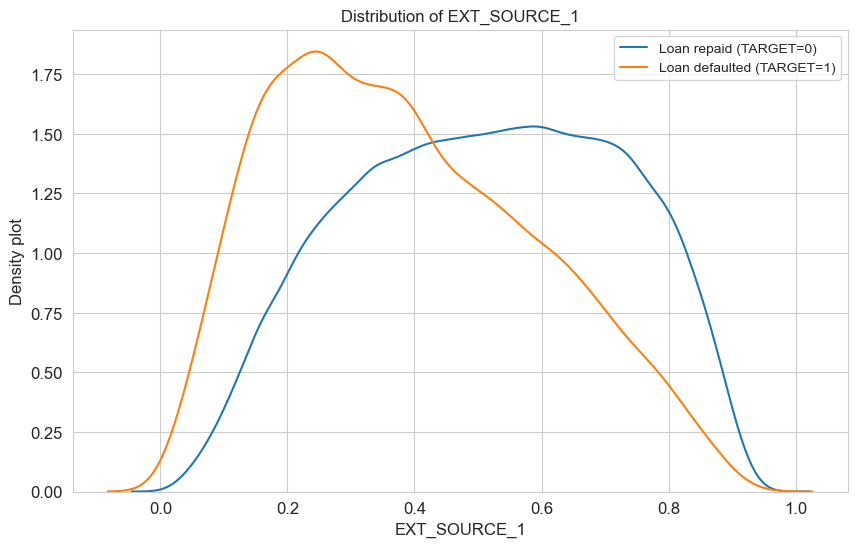

In [47]:
plot_distribution_gen('EXT_SOURCE_1',None,True)

### Insites

#### For the feature, EXT_SOURCE_1, we can see that as value of EXT_SOURCE_1 increases, the probability of loan being repaid also increases.

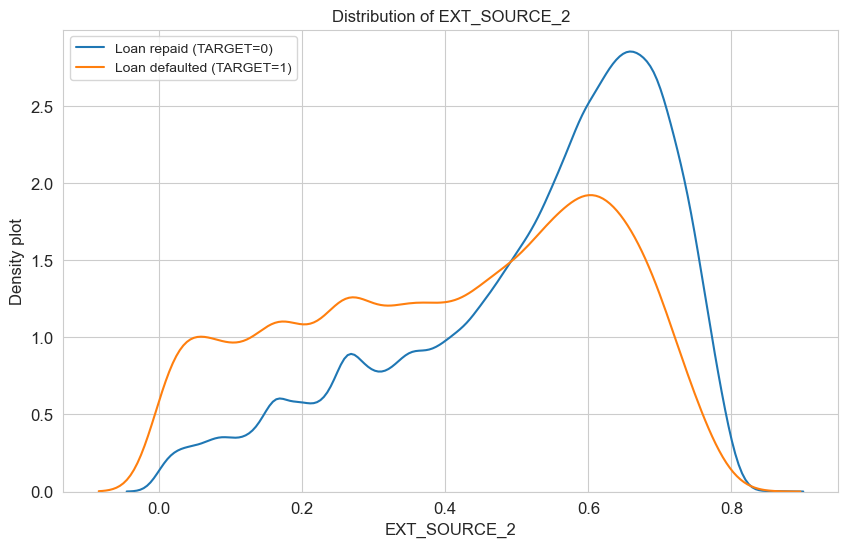

In [48]:
plot_distribution_gen('EXT_SOURCE_2',None,True)

### Insites

#### For the feature, EXT_SOURCE_2, we can see that as value of EXT_SOURCE_2 increases, the probability of loan being repaid also increases.

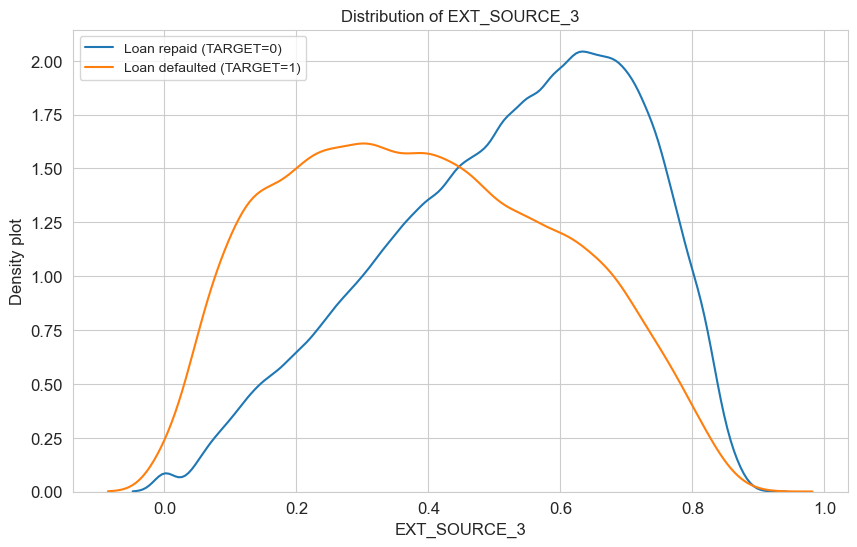

In [49]:
plot_distribution_gen('EXT_SOURCE_3',None,True)

### Insites

#### For the feature, EXT_SOURCE_3, we can see that as value of EXT_SOURCE_3 increases, the probability of loan being repaid also increases.

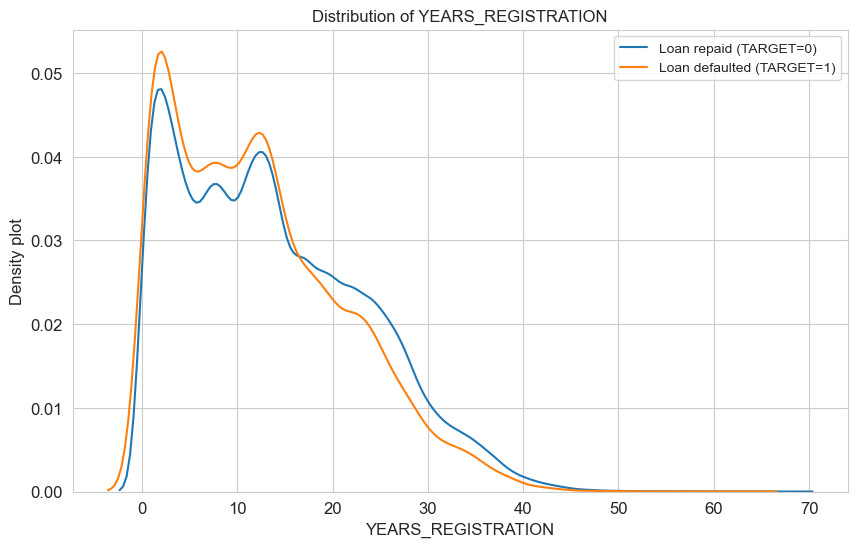

In [50]:
create_day_to_year(df1,['DAYS_REGISTRATION'],'YEARS_REGISTRATION')
plot_distribution_gen('YEARS_REGISTRATION',None,True)

### Insites 

#### For the feature, YEARS_REGISTRATION, we can see that there are more number of loans defaulted for lower number of years

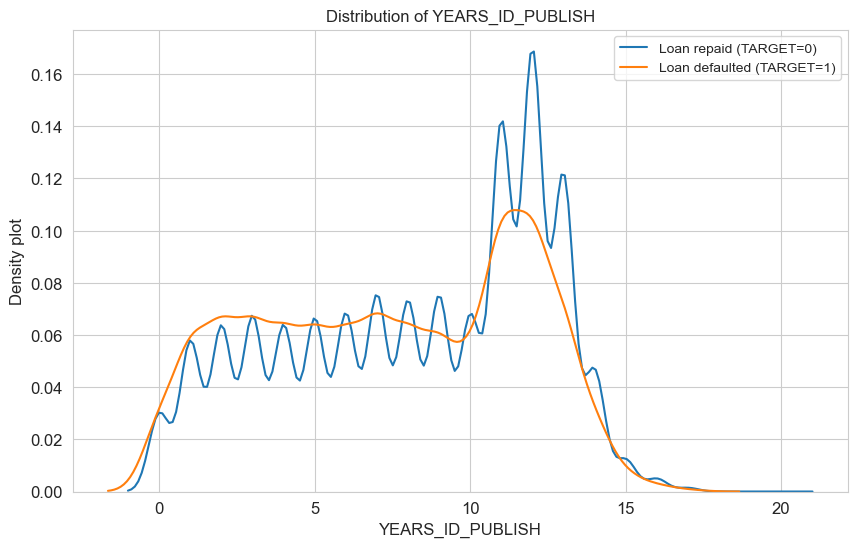

In [51]:
create_day_to_year(df1,['DAYS_ID_PUBLISH'],'YEARS_ID_PUBLISH')
plot_distribution_gen('YEARS_ID_PUBLISH',None,True)

### Insites 

#### For the feature, YEARS_ID_PUBLISH, we can see that there are more number of loans defaulted for lower number of years

## 3. Multivariate Analysis

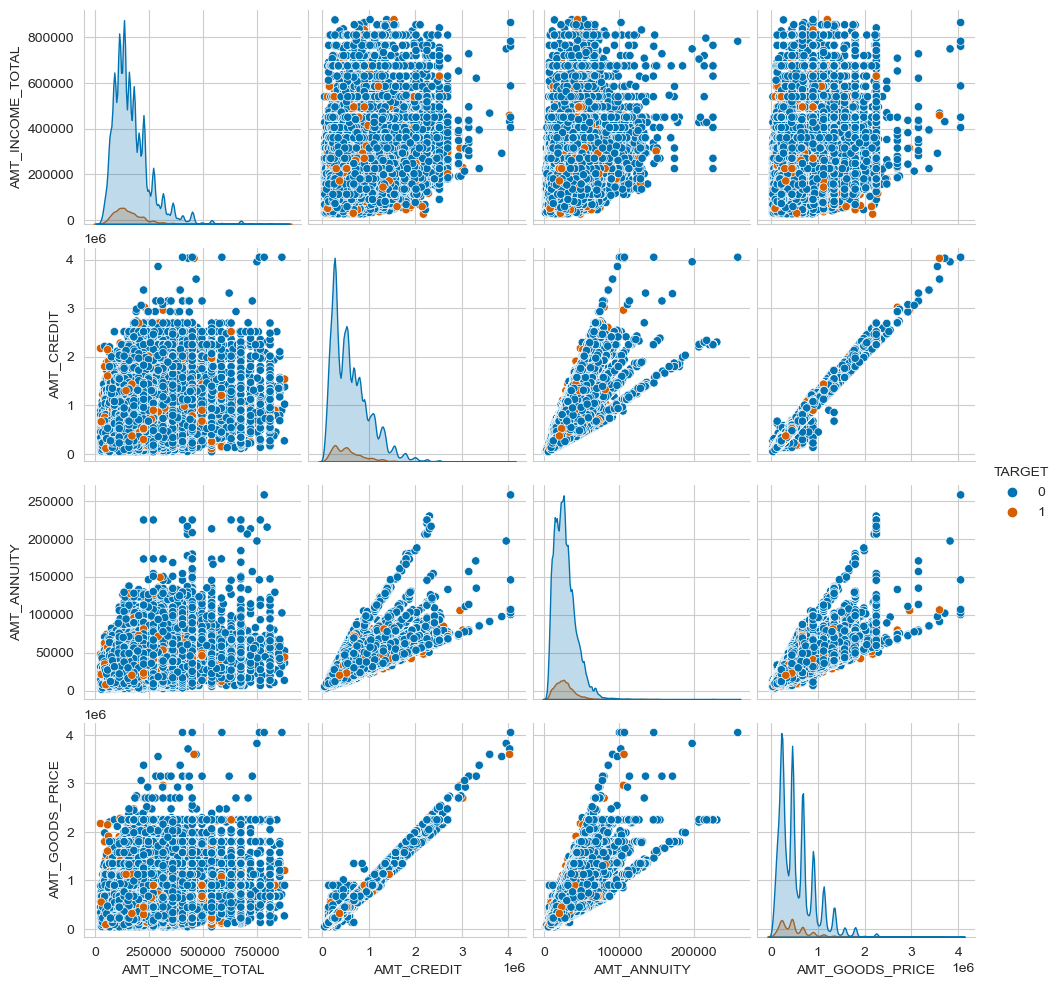

In [52]:
amt = df1[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
g = sns.pairplot(amt,hue="TARGET",palette=["b","r"])  

plt.show()

# 7. Data processing

In [53]:
def replace_day_outliers(data):
    """Replace 365243 with np.nan in any columns with DAYS"""
    for col in data.columns:
        if "DAYS" in col:
            data[col] = data[col].replace({365243: np.nan})

    return data

In [54]:
# Replace all the day outliers
application_train_new = replace_day_outliers(df1)
bureau_new = replace_day_outliers(df2)              
bureau_balance_new  = replace_day_outliers(df3)      
credit_card_balance_new  = replace_day_outliers(df4) 
installments_payments_new = replace_day_outliers(df5)
pos_cash_balance_new = replace_day_outliers(df6)   
previous_application_new  = replace_day_outliers(df7)

In [55]:
#Function for removing columns with missing values more than 60%

def remove_missing_col(data):
    miss_data = pd.DataFrame((data.isnull().sum())*100/data.shape[0])
    miss_data_col=miss_data[miss_data[0]>60].index
    data_new  = data[[i for i in data.columns if i not in miss_data_col]]
    return data_new

In [56]:
# Importing basic library

from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler

In [57]:
#Custom imputer for numerical and categorical variables.

# Create a custom imputer function for both numerical and categorical variables

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [58]:
# One-hot encoding of categorical variables in the main training dataset is done

# one-hot encoding of categorical variables

base_case_train = pd.get_dummies(application_train_new)

In [59]:
# Drop the SK_ID from the training data
skid_temp = application_train_new['SK_ID_CURR']
train = base_case_train.drop(columns = ['SK_ID_CURR'])
    
# Feature names
features = list(train.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Median imputation of missing values
train = DataFrameImputer().fit_transform(train)

## Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
base_case_train = pd.DataFrame(data=train, columns=features)

print('Data shape: ', base_case_train.shape)

Data shape:  (307511, 245)


In [60]:
# Visual of Modified data

base_case_train

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1.0,0.0,0.207607,0.090287,0.090032,0.077441,0.256321,0.098901,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.286846,0.311736,0.132924,0.271605,0.045016,0.098901,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.049128,0.022472,0.020025,0.023569,0.134897,0.285714,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.128368,0.066837,0.109477,0.063973,0.107023,0.098901,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.112520,0.116854,0.078975,0.117845,0.392880,0.098901,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0.154781,0.052360,0.101176,0.046016,0.446855,0.098901,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307507,0.0,0.0,0.054411,0.056067,0.040505,0.046016,0.344429,0.098901,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
307508,0.0,0.0,0.149498,0.157969,0.110618,0.135802,0.065247,0.098901,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307509,1.0,0.0,0.170629,0.081175,0.072499,0.069585,0.069553,0.098901,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [61]:
# The index variable is reattached to the dataset

base_case_train['SK_ID_CURR'] = skid_temp

print('Data shape: ', base_case_train.shape)

Data shape:  (307511, 246)


# 8. Model Creation

In [62]:
pip install featuretools

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: featuretools in c:\users\dell\anaconda3\lib\site-packages (1.31.0)



In [63]:
# import featuretools for automated feature engineering
import featuretools as ft 
from featuretools import selection
from sklearn.utils import resample

In [64]:
#Model function

def model_run(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    
    accuracy = accuracy_score(dtest_Y,predictions)
    classify_metrics = classification_report(dtest_Y,predictions)
    f1=f1_score(dtest_Y,predictions)
    
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    auc_score = auc(fpr,tpr)
    
    print (algorithm)
    print ("Accuracy score : ", accuracy)
    print ("F1 score : ", f1)
    print ("AUC : ", auc_score)
    print ("classification report :\n", classify_metrics)
    
    return accuracy, classify_metrics, fpr , tpr, auc_score, f1

In [65]:
# Iterate through the columns and record the Boolean columns

def bool_type(data):

    col_type = {}

    for col in data:
        # If column is a number with only two values, encode it as a Boolean
        if (data[col].dtype != 'object') and (len(data[col].unique()) <= 2):
            col_type[col] = ft.variable_types.Boolean

    print('Number of boolean variables: ', len(col_type))
    return col_type

In [66]:
# Entity set with id applications
es = ft.EntitySet(id = 'clients')

In [67]:
# List the primitives in a dataframe
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100
primitives[primitives['type'] == 'aggregation'].head(10)

,name,type,description,valid_inputs,return_type
0,median_count,aggregation,Calculates the number of occurrences of the median value in a list,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
1,num_true,aggregation,Counts the number of `True` values.,"<ColumnSchema (Logical Type = Boolean)>, <ColumnSchema (Logical Type = BooleanNullable)>",<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
2,average_count_per_unique,aggregation,Determines the average count across all unique value.,<ColumnSchema (Semantic Tags = ['category'])>,<ColumnSchema (Logical Type = Double) (Semantic Tags = ['numeric'])>
3,max_consecutive_zeros,aggregation,Determines the maximum number of consecutive zero values in the input,"<ColumnSchema (Logical Type = Integer)>, <ColumnSchema (Logical Type = Double)>",<ColumnSchema (Logical Type = Integer) (Semantic Tags = ['numeric'])>
4,std,aggregation,"Computes the dispersion relative to the mean value, ignoring `NaN`.",<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
5,num_false_since_last_true,aggregation,Calculates the number of 'False' values since the last `True` value. Description: From a series ...,<ColumnSchema (Logical Type = Boolean)>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
6,trend,aggregation,Calculates the trend of a column over time.,"<ColumnSchema (Logical Type = Datetime) (Semantic Tags = ['time_index'])>, <ColumnSchema (Semant...",<ColumnSchema (Semantic Tags = ['numeric'])>
7,max_consecutive_false,aggregation,Determines the maximum number of consecutive False values in the input,<ColumnSchema (Logical Type = Boolean)>,<ColumnSchema (Logical Type = Integer) (Semantic Tags = ['numeric'])>
8,min_count,aggregation,Calculates the number of occurrences of the min value in a list,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
9,kurtosis,aggregation,Calculates the kurtosis for a list of numbers,"<ColumnSchema (Logical Type = Integer) (Semantic Tags = ['numeric'])>, <ColumnSchema (Logical Ty...",<ColumnSchema (Logical Type = Double) (Semantic Tags = ['numeric'])>


In [68]:
primitives[primitives['type'] == 'transform'].head(10)

,name,type,description,valid_inputs,return_type
65,is_lunch_time,transform,"Determines if a datetime falls during configurable lunch hour, on a 24-hour clock.",<ColumnSchema (Logical Type = Datetime)>,<ColumnSchema (Logical Type = BooleanNullable)>
66,percent_change,transform,Determines the percent difference between values in a list.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = Double) (Semantic Tags = ['numeric'])>
67,rolling_count,transform,Determines a rolling count of events over a given window.,<ColumnSchema (Logical Type = Datetime) (Semantic Tags = ['time_index'])>,<ColumnSchema (Logical Type = Double) (Semantic Tags = ['numeric'])>
68,greater_than,transform,Determines if values in one list are greater than another list.,"<ColumnSchema (Logical Type = Datetime)>, <ColumnSchema (Logical Type = Ordinal: None)>, <Column...",<ColumnSchema (Logical Type = BooleanNullable)>
69,cum_sum,transform,Calculates the cumulative sum.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
70,is_weekend,transform,Determines if a date falls on a weekend.,<ColumnSchema (Logical Type = Datetime)>,<ColumnSchema (Logical Type = BooleanNullable)>
71,number_of_hashtags,transform,Determines the number of hashtags in a string.,<ColumnSchema (Logical Type = NaturalLanguage)>,<ColumnSchema (Logical Type = IntegerNullable) (Semantic Tags = ['numeric'])>
72,expanding_max,transform,Computes the expanding maximum of events over a given window.,"<ColumnSchema (Semantic Tags = ['numeric'])>, <ColumnSchema (Logical Type = Datetime) (Semantic ...",<ColumnSchema (Semantic Tags = ['numeric'])>
73,modulo_by_feature,transform,Computes the modulo of a scalar by each element in a list.,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
74,weekday,transform,Determines the day of the week from a datetime.,<ColumnSchema (Logical Type = Datetime)>,"<ColumnSchema (Logical Type = Ordinal: [0, 1, 2, 3, 4, 5, 6]) (Semantic Tags = ['category'])>"


In [69]:
#Model function

def model_run(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    
    accuracy = accuracy_score(dtest_Y,predictions)
    classify_metrics = classification_report(dtest_Y,predictions)
    f1=f1_score(dtest_Y,predictions)
    
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    auc_score = auc(fpr,tpr)
    
    print (algorithm)
    print ("Accuracy score : ", accuracy)
    print ("F1 score : ", f1)
    print ("AUC : ", auc_score)
    print ("classification report :\n", classify_metrics)
    
    return accuracy, classify_metrics, fpr , tpr, auc_score, f1

In [70]:
# Drop the SK_ID from the training data
skid_temp = application_train_new['SK_ID_CURR']
train = base_case_train.drop(columns = ['SK_ID_CURR'])
    
# Feature names
features = list(train.columns)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Median imputation of missing values
train = DataFrameImputer().fit_transform(train)

## Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
base_case_train = pd.DataFrame(data=train, columns=features)

print('Data shape: ', base_case_train.shape)

Data shape:  (307511, 245)


In [71]:
# Train-Test split -- temporary
# Logistic regression - sanity check 

from sklearn.model_selection import train_test_split

#splitting application_train_newdf into train and test
train,test = train_test_split(base_case_train,test_size=.25,random_state = 123)

#separating dependent and independent variables
train_X = train[[i for i in train.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
train_Y = train[["TARGET"]]

test_X  = test[[i for i in test.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
test_Y  = test[["TARGET"]]

In [72]:
# Down-sample Majority Class

count = train['TARGET'].value_counts()
num_majority = count[0]
num_minority = count[1]

#Number of undersampled majority class 2 x minority class
num_undersample_majority = 2 * num_minority

#separating majority and minority classes
df_majority = train[train["TARGET"] == 0]
df_minority = train[train["TARGET"] == 1]

df_majority_undersampled = resample(df_majority, replace=False,
                                   n_samples=num_undersample_majority,
                                   random_state=123)

df_undersampled = pd.concat([df_minority,df_majority_undersampled],axis=0)

#splitting dependent and independent variables

df_undersampled_X = df_undersampled[[i for i in df_undersampled.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
df_undersampled_Y = df_undersampled[["TARGET"]]

## Model 1: Logistic Regression

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,roc_curve,auc, f1_score

In [74]:
logit = LogisticRegression()
accuracy_logit, classify_metrics_logit, fpr_logit , tpr_logit, auc_score_logit, f1_logit = model_run(logit,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

LogisticRegression()
Accuracy score :  0.8406696324045891
F1 score :  0.28863464777280917
AUC :  0.7429739454201447
classification report :
               precision    recall  f1-score   support

         0.0       0.94      0.88      0.91     70609
         1.0       0.23      0.40      0.29      6269

    accuracy                           0.84     76878
   macro avg       0.58      0.64      0.60     76878
weighted avg       0.88      0.84      0.86     76878



## Model 2: Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
accuracy_rfc, classify_metrics_rfc, fpr_rfc , tpr_rfc, auc_score_rfc, f1_rfc = model_run(rfc,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

RandomForestClassifier()
Accuracy score :  0.8677775176253284
F1 score :  0.2724214444205855
AUC :  0.7337379098947376
classification report :
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93     70609
         1.0       0.25      0.30      0.27      6269

    accuracy                           0.87     76878
   macro avg       0.59      0.61      0.60     76878
weighted avg       0.88      0.87      0.87     76878



## Model 3: Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
accuracy_dtc, classify_metrics_dtc, fpr_dtc , tpr_dtc, auc_score_dtc, f1_dtc = model_run(dtc,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

DecisionTreeClassifier()
Accuracy score :  0.6864122375712167
F1 score :  0.18871988154529548
AUC :  0.577461884760978
classification report :
               precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     70609
         1.0       0.12      0.45      0.19      6269

    accuracy                           0.69     76878
   macro avg       0.53      0.58      0.50     76878
weighted avg       0.87      0.69      0.76     76878



## Model 4: Gaussian Naive Bayes Classifier

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
accuracy_gnb, classify_metrics_gnb, fpr_gnb , tpr_gnb, auc_score_gnb, f1_gnb = model_run(gnb,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

GaussianNB()
Accuracy score :  0.19746871666796742
F1 score :  0.15736352586077382
AUC :  0.5897865461309929
classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.13      0.23     70609
         1.0       0.09      0.92      0.16      6269

    accuracy                           0.20     76878
   macro avg       0.52      0.53      0.20     76878
weighted avg       0.88      0.20      0.23     76878



## Model 5: XGBoost Classifier

In [78]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
accuracy_xgb, classify_metrics_xgb, fpr_xgb, tpr_xgb, auc_score_xgb, f1_xgb = model_run(xgb,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy score :  0.8261010952418117
F1 score :  0.2949211539475766
AUC :  0.744570826657249
classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     70609
         1.0   

## Model 6: Gradient Boosting Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
accuracy_gbc, classify_metrics_gbc, fpr_gbc, tpr_gbc, auc_score_gbc, f1_gbc = model_run(gbc,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

GradientBoostingClassifier()
Accuracy score :  0.8477848018939098
F1 score :  0.29860944617597696
AUC :  0.7512545407966664
classification report :
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.91     70609
         1.0       0.24      0.40      0.30      6269

    accuracy                           0.85     76878
   macro avg       0.59      0.64      0.61     76878
weighted avg       0.89      0.85      0.86     76878



## Model 7: LightGBM Classifier

In [80]:
!pip install lightgbm

In [81]:
pip install --upgrade lightgbm


Note: you may need to restart the kernel to use updated packages.


In [82]:
import lightgbm
print(lightgbm.__version__)

4.4.0


In [83]:
from lightgbm import LGBMClassifier
import re
import lightgbm as lgb
import json

In [84]:
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

#Split into training and evaluation sets
x_train, x_eval, y_train, y_eval = train_test_split(df_undersampled_X, df_undersampled_Y, test_size=0.2, random_state=42)

#Remove possible JSON characters
x_train = x_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
x_eval = x_eval.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_eval = y_eval.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Train the model
model.fit(x_train, y_train, eval_set = [(x_eval, y_eval)], eval_names =['valid'], eval_metric ='auc');

# prediction
predictions = model.predict(test_X);
prediction_probabilities = model.predict_proba(test_X)[:,1];

# metrics
accuracy_lgbc = accuracy_score(test_Y,predictions)
classify_metrics_lgbc = classification_report(test_Y,predictions)  
fpr_lgbc , tpr_lgbc , thresholds   = roc_curve(test_Y,prediction_probabilities)
auc_score_lgbc = auc(fpr_lgbc,tpr_lgbc)
f1_lgbc=f1_score(test_Y,predictions)

[LightGBM] [Info] Number of positive: 14807, number of negative: 29727
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10004
[LightGBM] [Info] Number of data points in the train set: 44534, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


In [85]:
print ("Accuracy score : ", accuracy_lgbc)
print ("F1 score : ", f1_lgbc)
print ("AUC : ", auc_score_lgbc)
print ("classification report :\n", classify_metrics_lgbc)

Accuracy score :  0.7900049428965373
F1 score :  0.2794143902874487
AUC :  0.7360076691758978
classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.82      0.88     70609
         1.0       0.19      0.50      0.28      6269

    accuracy                           0.79     76878
   macro avg       0.57      0.66      0.58     76878
weighted avg       0.89      0.79      0.83     76878



# 9. Model Evalution 

In [86]:
# Combine results together and compare stats for all

classifier_names =['Logistic Regression','Random Forest','Decision Tree','Gaussian Naive Bayes','XGBoost','Gradient Boosting','LightGBM']
accuracy_scores = [accuracy_logit, accuracy_rfc, accuracy_dtc, accuracy_gnb, accuracy_xgb, accuracy_gbc, accuracy_lgbc] 
f1_scores = [f1_logit, f1_rfc, f1_dtc, f1_gnb, f1_xgb, f1_gbc, f1_lgbc]
auc_scores = [auc_score_logit, auc_score_rfc, auc_score_dtc, auc_score_gnb, auc_score_xgb, auc_score_gbc, auc_score_lgbc]

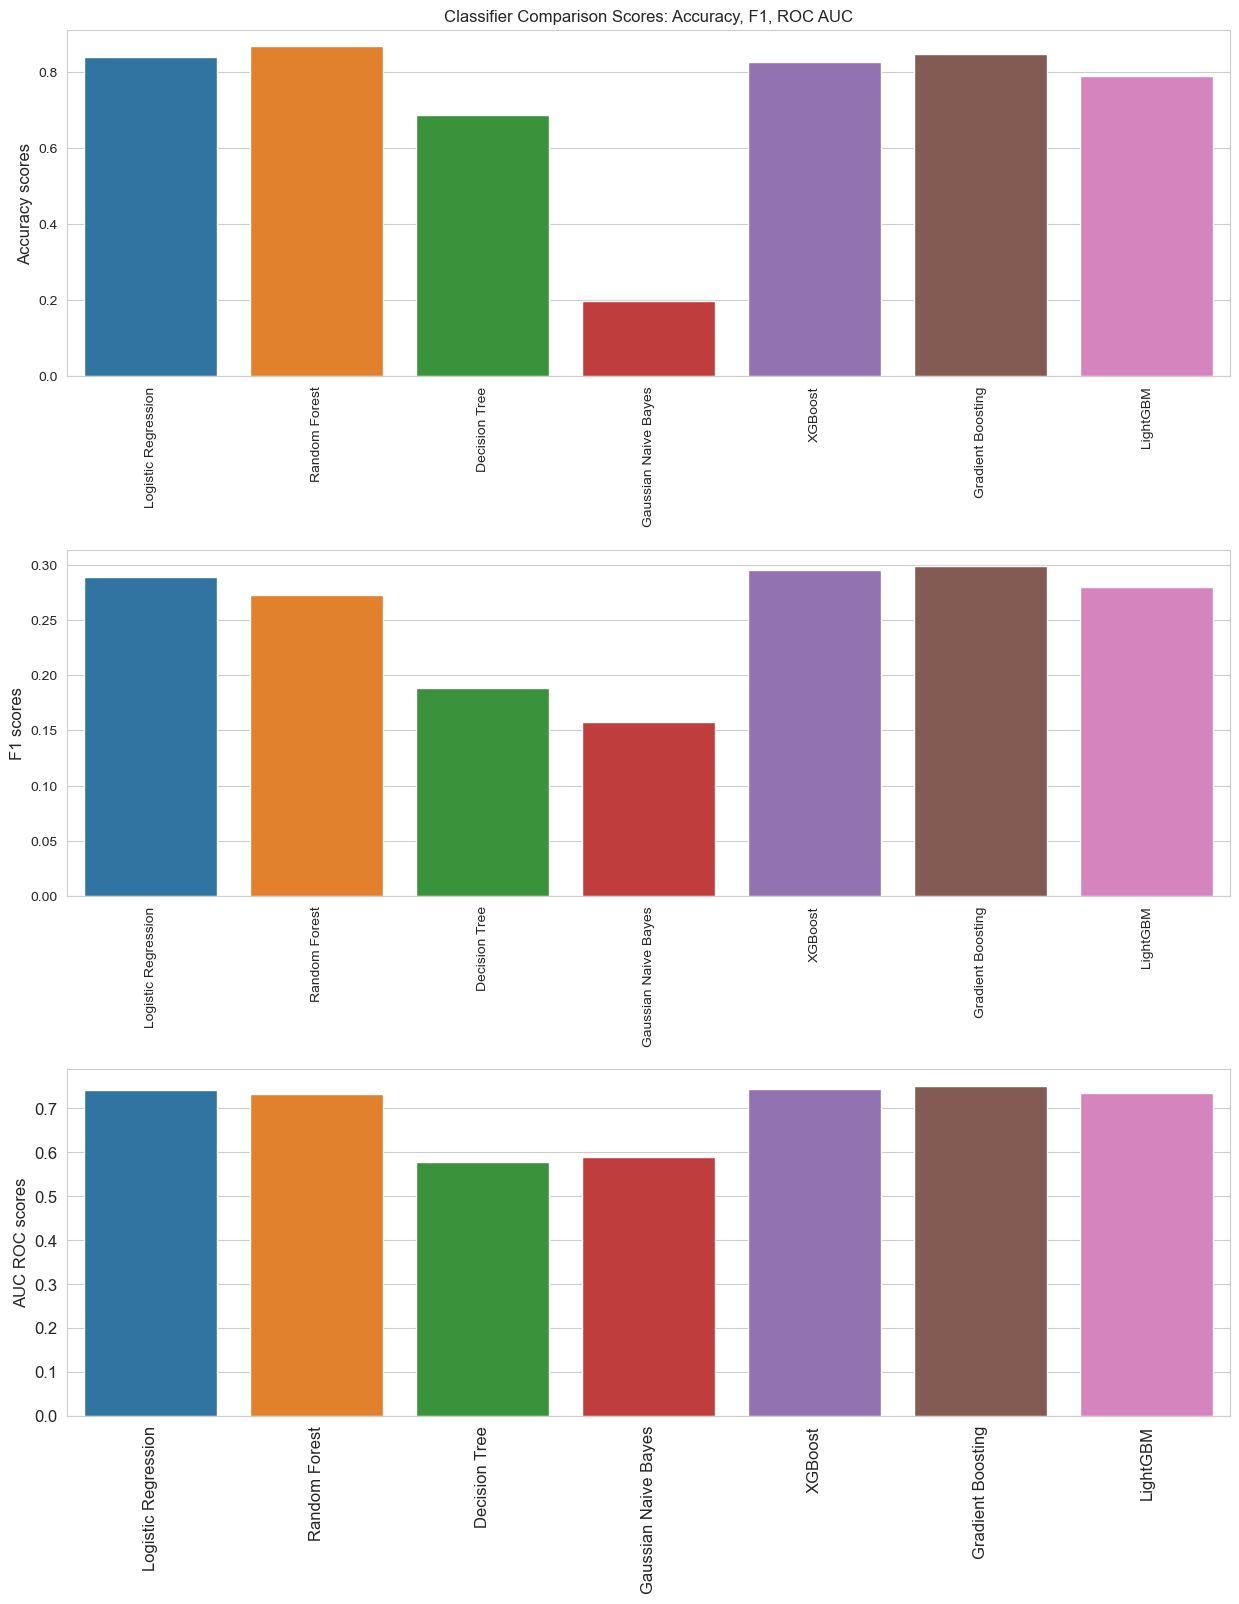

In [87]:
sns.set_color_codes("colorblind")
    
plt.figure(figsize=(15,18))
plt.subplot(311)
plt.title('Classifier Comparison Scores: Accuracy, F1, ROC AUC')
s1 = sns.barplot(x = classifier_names, y=accuracy_scores)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
#s1.ylabel('accuracy scores', fontsize=12)
plt.ylabel('Accuracy scores', fontsize=12)
plt.subplot(312)
s2 = sns.barplot(x = classifier_names, y=f1_scores)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
#s2.ylabel('F1 scores', fontsize=12)
plt.ylabel('F1 scores', fontsize=12)
plt.subplot(313)
s3 = sns.barplot(x = classifier_names, y=auc_scores)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.ylabel('AUC ROC scores', fontsize=12)
   
plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace = 0.5)
plt.show();

### Insites

#### We can see from the comparisons of accuracy, F1 score and AUC ROC scores that all models have different rankings. The Logistic Regression and Gaussian Naive Bayes models have highest accuracy, but the lowest F1 scores. This shows that they do not work well for imbalanced data. The XGBoost, Gradient Boosting and LightGBM classifiers give good F1 and AUC ROC results. The AUC ROC scores can be better visualized using the ROC curves.

Text(0, 0.5, 'True Positive Rate')

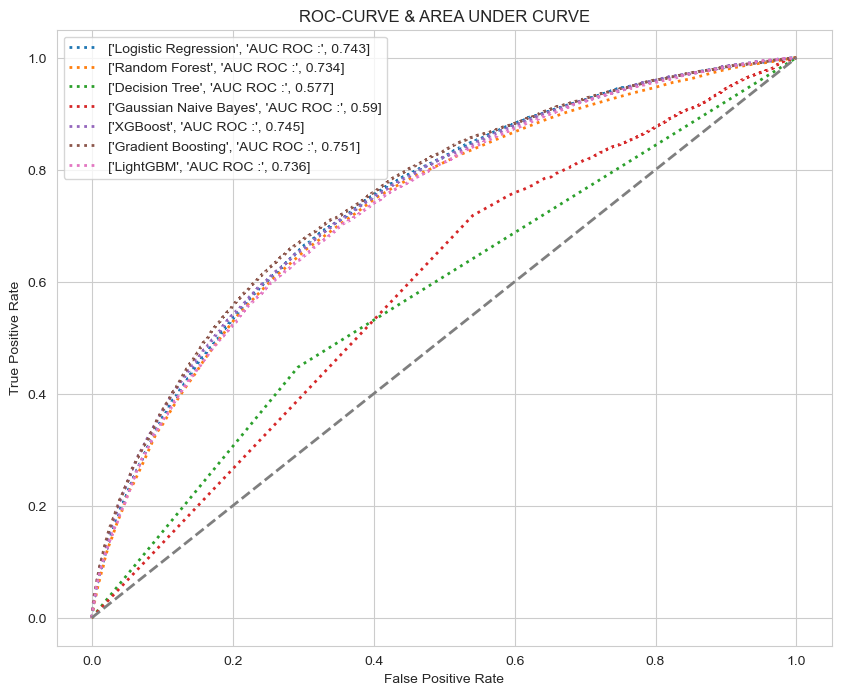

In [88]:
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
    
ax.plot(fpr_logit,tpr_logit,label = [classifier_names[0], "AUC ROC :", round(auc_score_logit,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_rfc,tpr_rfc,label = [classifier_names[1], "AUC ROC :", round(auc_score_rfc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_dtc,tpr_dtc,label = [classifier_names[2], "AUC ROC :", round(auc_score_dtc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_gnb,tpr_gnb,label = [classifier_names[3], "AUC ROC :", round(auc_score_gnb,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_xgb,tpr_xgb,label = [classifier_names[4], "AUC ROC :", round(auc_score_xgb,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_gbc,tpr_gbc,label = [classifier_names[5], "AUC ROC :", round(auc_score_gbc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_lgbc,tpr_lgbc,label = [classifier_names[6], "AUC ROC :", round(auc_score_lgbc,3)],linewidth=2,linestyle="dotted")

ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
plt.legend(loc="best")
plt.title("ROC-CURVE & AREA UNDER CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

### Insites

#### The AUC ROC scores improve as the curves rise higher above the diagonal. Since, the LightGBM classifier has the best score for AUC ROC (0.781), we can choose it while moving forward.

In [89]:
## K-Fold Cross validation to improve model

import gc
from sklearn.model_selection import KFold, cross_val_score

def model_classify(model_in, dtrain_X, dtrain_Y, dtest_X, dtest_Y, n_folds = 5):
    
    """Train and test a model using cross validation. 
    """
       
    # Extract the ids
    train_ids = dtrain_X.index
    test_ids = dtest_X.index
    
    print('Training Data Shape: ', dtrain_X.shape)
    print('Testing Data Shape: ', dtest_X.shape)
    
    # Extract feature names
    feature_names = list(dtrain_X.columns)
    
    # Convert to np arrays
    features = np.array(dtrain_X)
    test_features = np.array(dtest_X)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    predictions = np.zeros(test_features.shape[0])
    predictions_class = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # print model
    
    print (model_in)
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], dtrain_Y.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], dtrain_Y.iloc[valid_indices]
        
        model = model_in
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'])
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions    
        predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
             
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()
        
    # Make the predictions dataframe
    test_predictions = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(dtrain_Y, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    
    # Dataframe of validation scores
    fold_scores = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    predictions_class = model.predict(test_features, num_iteration = best_iteration)

    
    fpr , tpr , thresholds   = roc_curve(dtest_Y,predictions)
    auc_roc = auc(fpr,tpr)
    f1_sc = f1_score(dtest_Y,predictions_class)
    accuracy = accuracy_score(dtest_Y,predictions_class)
    classify_metrics = classification_report(dtest_Y,predictions_class)
       
    print (model)
    
    return feature_importances, classify_metrics, fold_scores, accuracy, f1_sc, auc_roc, fpr, tpr 

In [90]:
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

feature_importances, classify_metrics, fold_scores, accuracy, f1_sc, auc_score, fpr, tpr  = model_classify(model, df_undersampled_X, df_undersampled_Y, test_X, test_Y)

print('Baseline metrics')
print(fold_scores)

Training Data Shape:  (55668, 244)
Testing Data Shape:  (76878, 244)
LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=10000,
               n_jobs=-1, objective='binary', random_state=50, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)
[LightGBM] [Info] Number of positive: 14876, number of negative: 29658
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9972
[LightGBM] [Info] Number of data points in the train set: 44534, number of used features: 221
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 14827, number of negative: 29707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033909 seconds.
You can set `force_row_wise=true` to remove the overhead.
A

Accuracy score :  0.788079814771456
F1 score :  0.2766184175472871
AUC :  0.7481772173910691
classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.81      0.88     70609
         1.0       0.19      0.50      0.28      6269

    accuracy                           0.79     76878
   macro avg       0.57      0.66      0.58     76878
weighted avg       0.89      0.79      0.83     76878



Text(0, 0.5, 'True Positive Rate')

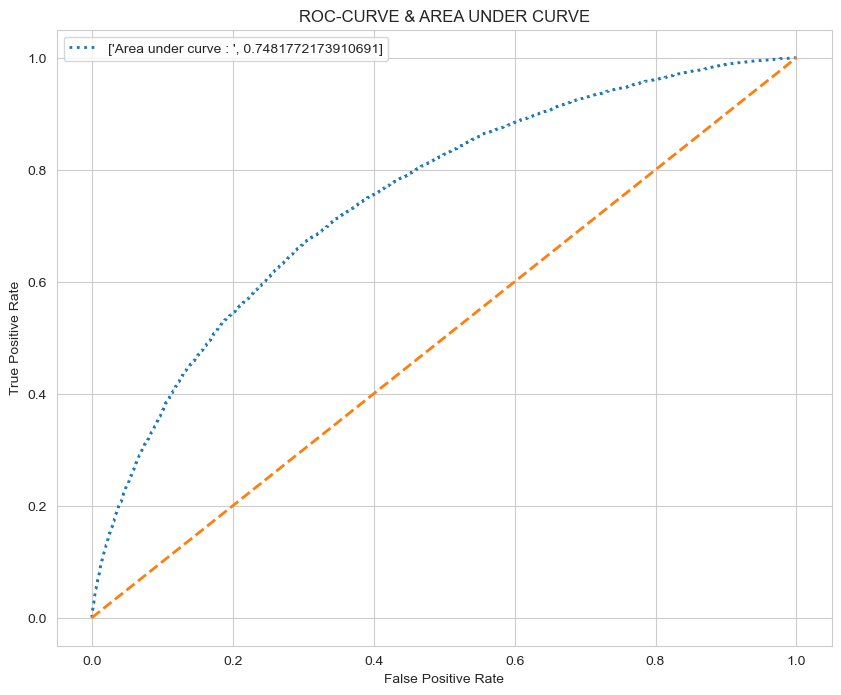

In [91]:
print ("Accuracy score : ", accuracy)
print ("F1 score : ", f1_sc)
print ("AUC : ", auc_score)
print ("classification report :\n", classify_metrics)
    
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
ax.plot(fpr,tpr,label   = ["Area under curve : ",auc_score],linewidth=2,linestyle="dotted")
ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
plt.legend(loc="best")
plt.title("ROC-CURVE & AREA UNDER CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [92]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

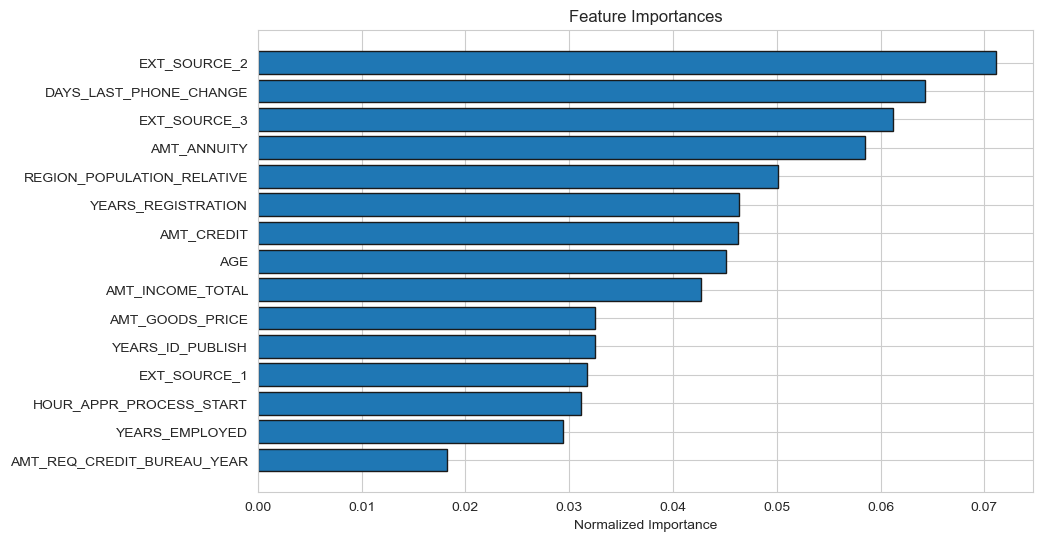

In [93]:
# Show the feature importances for the new features
feature_importances_sorted = plot_feature_importances(feature_importances)

# 10. Hyperparameter Tuning

In [94]:
!pip install hyperopt

In [95]:
#import library for hyperparameter optimization
import random
from hyperopt import STATUS_OK
from hyperopt import hp, tpe, Trials, fmin
from hyperopt.pyll.stochastic import sample

In [96]:
#Pre-processing

random.seed(50)

#Remove possible JSON characters
df_undersampled_X = df_undersampled_X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_undersampled_Y = df_undersampled_Y.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_X = test_X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_Y = test_Y.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Create a training and testing dataset
train_set = lgb.Dataset(data = df_undersampled_X, label = df_undersampled_Y)
test_set = lgb.Dataset(data = test_X, label = test_Y)

In [97]:
# Hyperparameter grid
param_grid = {
    'boosting_type': ['gbdt', 'goss'],
    'num_leaves': list(range(20, 150)),
    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}

N_FOLDS = 5

In [98]:
# Dataframes for random and grid search
MAX_EVALS = 20

random_results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                              index = list(range(MAX_EVALS)))

grid_results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                              index = list(range(MAX_EVALS)))

In [99]:
# Objective function

def objective(hyperparameters):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization.
    """
    
    # Keep track of evals
    global ITERATION
    
    ITERATION += 1
    
    print('current iteration:', ITERATION)
    
    # Using early stopping to find number of trees trained
    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    if 'subsample' not in hyperparameters:  
    
        # Retrieve the subsample
        subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    
        # Extract the boosting type and subsample to top level keys
        hyperparameters['boosting_type'] = hyperparameters['boosting_type']['boosting_type']
        hyperparameters['subsample'] = subsample
    
        # Make sure parameters that need to be integers are integers
        for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples']:
            hyperparameters[parameter_name] = int(hyperparameters[parameter_name])
            

    start = timer()
    
    # Perform n_folds cross validation
    cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 10000, nfold = N_FOLDS, 
                     metrics = 'auc', seed = 50)

    run_time = timer() - start
    
    # Extract the best score
    best_score = cv_results['auc-mean'][-1]
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = len(cv_results['auc-mean'])
    
    # Add the number of estimators to the hyperparameters
    hyperparameters['n_estimators'] = n_estimators

    # Write to the csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, best_score])
    of_connection.close()
    
    # Dictionary with information for evaluation
    dict_return = {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'train_time': run_time, 'score': best_score, 'status': STATUS_OK}

    return dict_return

In [100]:
  import itertools

In [101]:
def grid_search(param_grid, max_evals = MAX_EVALS):
    """Grid search algorithm (with limit on max evals)"""
    
    # Dataframe to store results
    results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                              index = list(range(MAX_EVALS)))
    
    #Create a list of all possible permutations of hyperparameters
    keys, values = zip(*param_grid.items())
    
    global ITERATION
    
    ITERATION = 0
    
    # Iterate through every possible combination of hyperparameters
    for v in itertools.product(*values):
        
        start = timer()
        
        # Create a hyperparameter dictionary
        hyperparameters = dict(zip(keys, v))
        
        # Set the subsample ratio accounting for boosting type
        hyperparameters['subsample'] = 1.0 if hyperparameters['boosting_type'] == 'goss' else hyperparameters['subsample']
        
        # Evalute the hyperparameters
        
        dict_return = objective(hyperparameters)
        eval_results = at(dict_return, 'score', 'hyperparameters', 'iteration')
           
        results.loc[ITERATION-1, :] = eval_results
        
        run_time = timer() - start
    
        print('run time:', run_time)
        
        # Normally would not limit iterations
        if ITERATION-1 > MAX_EVALS:
            break
       
    # Sort with best score on top
    results.sort_values('score', ascending = False, inplace = True)
    results.reset_index(inplace = True)
    
    return results

In [102]:
import pandas as pd
import itertools
from timeit import default_timer as timer

# Assuming `MAX_EVALS` is defined elsewhere in your code
MAX_EVALS = 100

def grid_search(param_grid, max_evals=MAX_EVALS):
    """Grid search algorithm (with limit on max evals)"""

    # Dataframe to store results
    results = pd.DataFrame(columns=['score', 'params', 'iteration'],
                           index=list(range(max_evals)))

    # Create a list of all possible permutations of hyperparameters
    keys, values = zip(*param_grid.items())

    global ITERATION
    ITERATION = 0

    # Iterate through every possible combination of hyperparameters
    for v in itertools.product(*values):
        start = timer()

        # Create a hyperparameter dictionary
        hyperparameters = dict(zip(keys, v))

        # Set the subsample ratio accounting for boosting type
        hyperparameters['subsample'] = 1.0 if hyperparameters['boosting_type'] == 'goss' else hyperparameters['subsample']

        # Evaluate the hyperparameters
        dict_return = objective(hyperparameters)

        # Ensure 'score' is a key in dict_return
        if 'score' in dict_return:
            score = dict_return['score']
        else:
            print(f"KeyError: 'score' not found in {dict_return}")
            continue

        eval_results = [score, hyperparameters, ITERATION]

        # Store results in the DataFrame
        results.loc[ITERATION, :] = eval_results
        ITERATION += 1

        run_time = timer() - start
        print(f'Iteration {ITERATION} run time: {run_time}')

        # Normally would not limit iterations
        if ITERATION >= max_evals:
            break

    # Sort with best score on top
    results.sort_values('score', ascending=False, inplace=True)
    results.reset_index(drop=True, inplace=True)

    return results

# Define the objective function for completeness
def objective(hyperparameters):
    # Placeholder function, should return a dictionary including 'score'
    return {'score': 0.5, 'hyperparameters': hyperparameters, 'iteration': ITERATION}

# Example usage
param_grid = {
    'boosting_type': ['gbdt', 'goss'],
    'num_leaves': [31, 127],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0]
}

results = grid_search(param_grid)
print(results)


Iteration 1 run time: 0.1611321999807842
Iteration 2 run time: 0.0002607000060379505
Iteration 3 run time: 0.00025660000392235816
Iteration 4 run time: 0.00036299999919719994
Iteration 5 run time: 0.0005405000119935721
Iteration 6 run time: 0.00020119998953305185
Iteration 7 run time: 0.00024279998615384102
Iteration 8 run time: 0.00019810002413578331
Iteration 9 run time: 0.000526399991940707
Iteration 10 run time: 0.00024729999131523073
Iteration 11 run time: 0.00017839999054558575
Iteration 12 run time: 0.0001747000205796212
Iteration 13 run time: 0.00016820000018924475
Iteration 14 run time: 0.0001644000003580004
Iteration 15 run time: 0.00016620001406408846
Iteration 16 run time: 0.00029139997786842287
   score  \
0    0.5   
1    0.5   
2    0.5   
3    0.5   
4    0.5   
..   ...   
95   NaN   
96   NaN   
97   NaN   
98   NaN   
99   NaN   

                                                                                  params  \
0    {'boosting_type': 'gbdt', 'num_leaves': 3

In [103]:
from timeit import default_timer as timer

In [104]:
MAX_EVALS = 20

grid_results = grid_search(param_grid)

print('The best validation score was {:.5f}'.format(grid_results.loc[0, 'score']))
print('\nThe best hyperparameters were:')

Iteration 1 run time: 0.0005893000052310526
Iteration 2 run time: 0.0004217999812681228
Iteration 3 run time: 0.00035409998963586986
Iteration 4 run time: 0.00034389999927952886
Iteration 5 run time: 0.00033569999504834414
Iteration 6 run time: 0.0003335000074002892
Iteration 7 run time: 0.00032629998167976737
Iteration 8 run time: 0.0003273999900557101
Iteration 9 run time: 0.0003361999988555908
Iteration 10 run time: 0.00033999999868683517
Iteration 11 run time: 0.00032309998641721904
Iteration 12 run time: 0.00032309998641721904
Iteration 13 run time: 0.00031460000900551677
Iteration 14 run time: 0.0002955000090878457
Iteration 15 run time: 0.0002911999763455242
Iteration 16 run time: 0.00028279999969527125
The best validation score was 0.50000

The best hyperparameters were:


In [105]:
import pprint

pprint.pprint(grid_results.loc[0, 'params'])

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'num_leaves': 31,
 'subsample': 0.8}


In [106]:
# Get the best grid parameters
grid_best_params = grid_results.loc[0, 'params']

# Create, train, test model
model = lgb.LGBMClassifier(**grid_best_params, random_state = 42)
model.fit(df_undersampled_X, df_undersampled_Y)

preds = model.predict_proba(test_X)[:, 1]

print('The best model from grid search scores {:.5f} ROC AUC on the test set.'.format(roc_auc_score(test_Y, preds)))

[LightGBM] [Info] Number of positive: 18556, number of negative: 37112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10108
[LightGBM] [Info] Number of data points in the train set: 55668, number of used features: 225
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
The best model from grid search scores 0.75623 ROC AUC on the test set.


In [107]:
# Random Search

def random_search(param_grid, max_evals = MAX_EVALS):
    """Random search for hyperparameter optimization"""
    
    # Dataframe for results
    results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                                  index = list(range(MAX_EVALS)))
    global ITERATION 
    
    ITERATION = 0
    
    # Keep searching until reach max evaluations
    for ITERATION in range(MAX_EVALS):
        
        start = timer()
        
        # Choose random hyperparameters
        hyperparameters = {k: random.sample(v, 1)[0] for k, v in param_grid.items()}
        hyperparameters['subsample'] = 1.0 if hyperparameters['boosting_type'] == 'goss' else hyperparameters['subsample']

        # Evaluate randomly selected hyperparameters
        dict_return = objective(hyperparameters)
        eval_results = at(dict_return, 'score', 'hyperparameters', 'iteration')
        
        results.loc[ITERATION-1, :] = eval_results
        
        run_time = timer() - start
    
        print('run time:', run_time)
    
    # Sort with best score on top
    results.sort_values('score', ascending = False, inplace = True)
    results.reset_index(inplace = True)
    return results

In [108]:
!pip install pydash

In [109]:
from pydash import at

In [110]:
MAX_EVALS = 50

random_results = random_search(param_grid)

print('The best validation score was {:.5f}'.format(random_results.loc[0, 'score']))
print('\nThe best hyperparameters were:')

pprint.pprint(random_results.loc[0, 'params'])

run time: 0.03703300000051968
run time: 0.0006822999857831746
run time: 0.0005383000243455172
run time: 0.0006785000150557607
run time: 0.0003996000159531832
run time: 0.0002841999812517315
run time: 0.0003868000057991594
run time: 0.00026509998133406043
run time: 0.00020139999105595052
run time: 0.0001957999775186181
run time: 0.00019449999672360718
run time: 0.00018699999782256782
run time: 0.00018509998335503042
run time: 0.0004589000018313527
run time: 0.00030770001467317343
run time: 0.0002429000160191208
run time: 0.00018889998318627477
run time: 0.0004008999967481941
run time: 0.0002440999960526824
run time: 0.00030189999961294234
run time: 0.00024120000307448208
run time: 0.00018709999858401716
run time: 0.00017970000044442713
run time: 0.0001771999814081937
run time: 0.00023980002151802182
run time: 0.00018679999629966915
run time: 0.00017899999511428177
run time: 0.0001748999929986894
run time: 0.0001748999929986894
run time: 0.00017770001431927085
run time: 0.000173899985384

In [111]:
# Get the best parameters
random_best_params = random_results.loc[0, 'params']

# Create, train, test model
model = lgb.LGBMClassifier(**random_best_params, random_state = 42)
model.fit(df_undersampled_X, df_undersampled_Y)

preds = model.predict_proba(test_X)[:, 1]

print('The best model from random search scores {:.5f} ROC AUC on the test set.'.format(roc_auc_score(test_Y, preds)))

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 18556, number of negative: 37112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10108
[LightGBM] [Info] Number of data points in the train set: 55668, number of used features: 225
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from s

In [112]:
# Bayesian optimization

# Define the search space
space = {
    'boosting_type': hp.choice('boosting_type', 
                                            [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
                                             {'boosting_type': 'goss', 'subsample': 1.0}]),
    'num_leaves': hp.quniform('num_leaves', 20, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.5)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0),
    'is_unbalance': hp.choice('is_unbalance', [True, False]),
}

# Create the Tree Parzen Estimator algorithm
tpe_algorithm = tpe.suggest

# Record results
trials = Trials()

In [113]:
import csv
from hyperopt import fmin, tpe, Trials, STATUS_OK

In [114]:
import csv
import json
from hyperopt import fmin, tpe, Trials, STATUS_OK

# Define your objective function
def objective(params):
    # Example evaluation logic
    # Replace this with your actual evaluation function
    # For instance, let's assume a simple quadratic function
    x = params['x']
    y = params['y']
    loss = (x - 2) ** 2 + (y - 3) ** 2  # Example loss function
    return {'loss': loss, 'status': STATUS_OK}

# Define your search space
space = {
    'x': hp.uniform('x', -10, 10),
    'y': hp.uniform('y', -10, 10)
}

MAX_EVALS = 50

# Create a new file and open a connection
OUT_FILE = 'bayesian_trials.csv'
with open(OUT_FILE, 'w', newline='') as of_connection:
    writer = csv.writer(of_connection)
    headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score']
    writer.writerow(headers)

# Record results
trials = Trials()

global ITERATION
ITERATION = 0

# Function to call objective function and choose hyperparameters
best = fmin(fn=objective, space=space, algo=tpe.suggest, trials=trials, max_evals=MAX_EVALS)

# Debug: Print trial results before sorting
print('Trial results:')
for i, trial in enumerate(trials.results):
    print(f"Trial {i}: {trial}")

# Check if all trials have 'loss' and 'status' keys
for trial in trials.results:
    if 'loss' not in trial or 'status' not in trial:
        print(f"Missing key in trial: {trial}")
        raise KeyError("Each trial result must contain 'loss' and 'status' keys.")

# Sort the trials with lowest loss (highest AUC) first
trials_dict = sorted(trials.results, key=lambda x: x['loss'])

print('Finished, best results')
print(trials_dict[:1])

# Save the trial results
with open('trials.json', 'w') as f:
    json.dump(trials_dict, f)


100%|████████████████████████████████████████████████| 50/50 [00:00<00:00, 64.78trial/s, best loss: 0.0678652858195673]
Trial results:
Trial 0: {'loss': 16.123081090198546, 'status': 'ok'}
Trial 1: {'loss': 55.77258304883718, 'status': 'ok'}
Trial 2: {'loss': 69.50138405221281, 'status': 'ok'}
Trial 3: {'loss': 31.579791316905936, 'status': 'ok'}
Trial 4: {'loss': 62.08396372434073, 'status': 'ok'}
Trial 5: {'loss': 2.4023405302143903, 'status': 'ok'}
Trial 6: {'loss': 173.46268895861598, 'status': 'ok'}
Trial 7: {'loss': 94.50045674500895, 'status': 'ok'}
Trial 8: {'loss': 28.592637465867117, 'status': 'ok'}
Trial 9: {'loss': 143.13202110434912, 'status': 'ok'}
Trial 10: {'loss': 10.92385109634796, 'status': 'ok'}
Trial 11: {'loss': 20.300104671711438, 'status': 'ok'}
Trial 12: {'loss': 32.92319776322381, 'status': 'ok'}
Trial 13: {'loss': 43.21201714771389, 'status': 'ok'}
Trial 14: {'loss': 174.7350943846032, 'status': 'ok'}
Trial 15: {'loss': 13.988283149682779, 'status': 'ok'}
Tri

In [115]:
MAX_EVALS = 50

# Create a new file and open a connection
OUT_FILE = 'bayesian_trials.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

# Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score']
writer.writerow(headers)
of_connection.close()

# Record results
trials = Trials()

global ITERATION

ITERATION = 0 

#function to call objective function and choose hyperparameters

best = fmin(fn = objective, space = space, algo = tpe.suggest,
            trials = trials, max_evals = MAX_EVALS)


100%|████████████████████████████████████████████████| 50/50 [00:00<00:00, 94.15trial/s, best loss: 0.4357134761128566]


# 11. CONCLUSION

### We can the behaviors of each tuning method with increasing iterations in the above figure. The grid search scores do not differ much since during each iteration, only one hyperparameter is incrementally changed. The random search scores are scattered with no noticeable trend but have the highest validation ROC AUC score simply by finding a favorable combination. The Bayesian search can be observed to have progressively better scores with increasing iterations as expected, and if the number of iterations were increased could have surpassed the score from random method



# ...............................................Thank You !! .......................................................... 